# 📊 DM2425_ABCDEats
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

### **Introduction**

This notebook outlines the steps taken to preprocess customer data for clustering and segmentation analysis. 

Preprocessing is a key step to ensure the data is clean, consistent, and ready for modeling. 

The main focus here is on:
- **Handling missing data**: Filling in gaps to make the dataset complete.
- **Outlier detection and treatment**: Addressing unusual data points that could skew results.
- **Feature scaling**: Standardizing numerical features for better comparability.
- **Feature engineering**: Creating new features to capture customer behavior more effectively.

This work is part of a larger analysis and serves as the foundation for the **second notebook (Group 51 Clustering)**, where clustering is applied.

## <a id="top"></a> Index

1. [Exploration of the Dataset](#1.-exploration-of-the-dataset)   
   1.2 [Identify Trends, Patterns, or Anomalies](#1.2-identify-trends-patterns-or-anomalies)  
   1.3 [Descriptive Statistics](#1.3-descriptive-statistics)  
   1.4 [Visualization](#1.4-visualization)    
   1.5 [Trend Analysis](#1.5-trend-analysis) 

2. [Preprocessing](#2.-preprocessing)     
   2.1 [Outliers](#2.1-outliers)  
   2.2 [Create New Features](#2.2-create-new-features)      
   2.3 [Scaling Numerical Data (MinMaxScaler)](#2.3-scaling-numerical-data-minmaxscaler)     
   2.4 [Feature Selection](#2.4-feature-selection)     

3. [Export](#3.-export)

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
from scipy.stats import zscore

**Read the Dataset**

In [3]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")
data_copy = data.copy()

**Set the index to the customer_id column**

In [4]:
data.set_index('customer_id', inplace=True)

# 1. Exploration of the Dataset
[⬆️ Back to Top](#top)

**Initial Analysis**

To kick off our deep exploration, we’ll use the `data.info()` command to get an overview of the dataset. This command provides essential information, including the number of entries, column names, non-null counts, and data types for each variable. This quick summary will allow us to identify any missing values, spot potential data type issues, and gain a high-level understanding of the dataset's structure, setting the stage for further analysis.



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

**Check data types of our variables**

In this step, we’ll use the `data.dtypes` command to examine the data types of each variable in our dataset. This overview will confirm if the variables are appropriately typed (e.g., integers, floats, objects) and will help us spot any inconsistencies or unexpected types that might require adjustment. Understanding the data types at this stage is crucial, as it guides us in selecting suitable preprocessing and analysis techniques for each variable.

In [6]:
data.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Summary Stats**

In this step, we use the `.describe(include='all').transpose()` function to generate a summary of the dataset's statistical properties. This includes metrics like count, mean, standard deviation, minimum, and maximum for numerical variables, as well as unique values and frequencies for categorical variables. These insights help us understand the distribution and variability of the data and identify any anomalies or outliers.

In [7]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_region,31888.0,9.0,8670.0,9761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31161.0,NaN,NaN,NaN,27.506499,7.160898,15.0,23.0,26.0,31.0,80.0
vendor_count,31888.0,NaN,NaN,NaN,3.102609,2.771587,0.0,1.0,2.0,4.0,41.0
product_count,31888.0,NaN,NaN,NaN,5.668245,6.957287,0.0,2.0,3.0,7.0,269.0
is_chain,31888.0,NaN,NaN,NaN,2.818866,3.977529,0.0,1.0,2.0,3.0,83.0
first_order,31782.0,NaN,NaN,NaN,28.478604,24.109086,0.0,7.0,22.0,45.0,90.0
last_order,31888.0,NaN,NaN,NaN,63.675521,23.226123,0.0,49.0,70.0,83.0,90.0
last_promo,31888,4,-,16748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,31888,3,CARD,20161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUI_American,31888.0,NaN,NaN,NaN,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21


**Check Missing Values**

The `.isnull().sum()` command is used to identify missing values across all columns in the dataset. By examining the results, we can pinpoint features that require imputation or further attention in the preprocessing stage. This step ensures that missing data does not affect the quality of our analysis.

In [8]:
data.isnull().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

## 1.1 Numeric and categorical Variables

We separate the dataset into numeric and categorical variables by defining `number_var` and `category_var`.

[⬆️ Back to Top](#top)

In [9]:
category_var = ['customer_region', 'last_promo', 'payment_method']

In [10]:
number_var = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 
              'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
              'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
              'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 
              'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
              'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 
              'HR_21', 'HR_22', 'HR_23']

In [11]:
print("Categorical Variable Types:")
print(data[category_var].dtypes)
print("\nNumerical Variable Types:")
print(data[number_var].dtypes)

Categorical Variable Types:
customer_region    object
last_promo         object
payment_method     object
dtype: object

Numerical Variable Types:
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                    

## 1.2 Descriptive Statistics

Using `data[number_var].describe()`, we generate summary statistics like we did before but now only for the numeric variables. Additionally, for categorical variables, the `value_counts()` function gives us the distribution of each category.

[⬆️ Back to Top](#top)

In [12]:
data[number_var].describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [13]:
for var in category_var:
    print(f"Distribution for {var}:")
    print(data[var].value_counts(normalize=True) * 100)
    print("\n")

Distribution for customer_region:
customer_region
8670    30.610261
4660    29.948570
2360    27.687531
2440     4.650652
4140     2.687531
8370     1.552308
2490     1.395509
-        1.386101
8550     0.081535
Name: proportion, dtype: float64


Distribution for last_promo:
last_promo
-           52.521325
DELIVERY    19.712745
DISCOUNT    14.099348
FREEBIE     13.666583
Name: proportion, dtype: float64


Distribution for payment_method:
payment_method
CARD    63.224410
DIGI    19.132589
CASH    17.643001
Name: proportion, dtype: float64




## 1.2 Visualizations

[⬆️ Back to Top](#top)

### Histograms

In this step, we visualize the distribution of our numerical features using histograms. 

This provides an overview of the data distribution, highlighting potential skewness, peaks, and areas of high or low frequency.

- **Total Orders per Hours**

Here, we analyze customer activity across hours of the day by summing the hourly data for all customers. Using a bar plot, we visualize the distribution of total orders per hour. 

This helps us understand peak activity times and customer behavior patterns, providing valuable insights for feature engineering.

C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4243654909.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4243654909.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


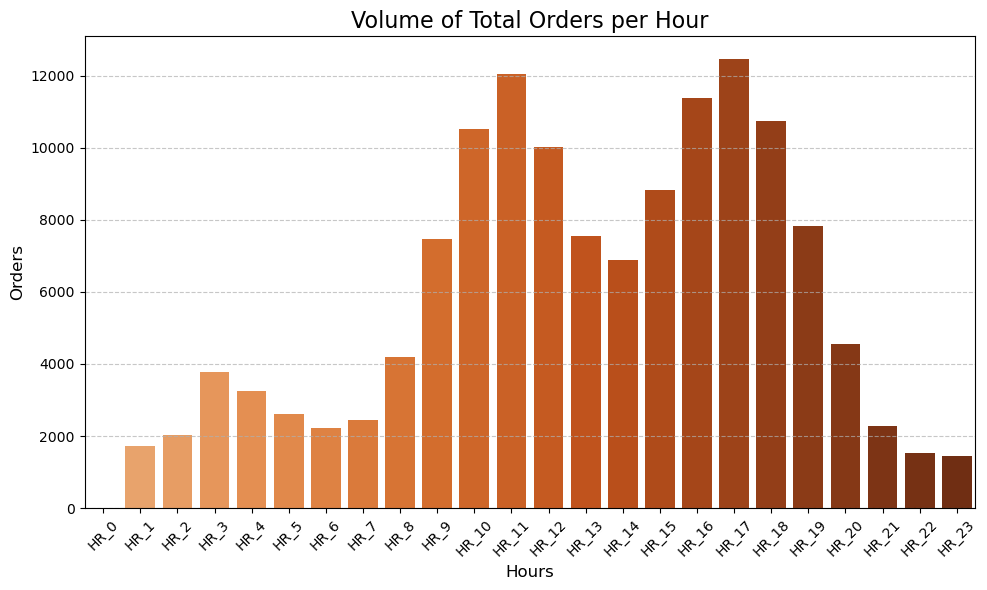

In [14]:
hour_columns = [f'HR_{i}' for i in range(24)]
hourly_order_volume = data[hour_columns].sum()

colors = plt.cm.Oranges(np.linspace(0.4, 1, len(hourly_order_volume)))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=hourly_order_volume.index,
    y=hourly_order_volume.values,
    palette=colors
)

plt.title("Volume of Total Orders per Hour", fontsize=16)
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Distribution of Main Features**

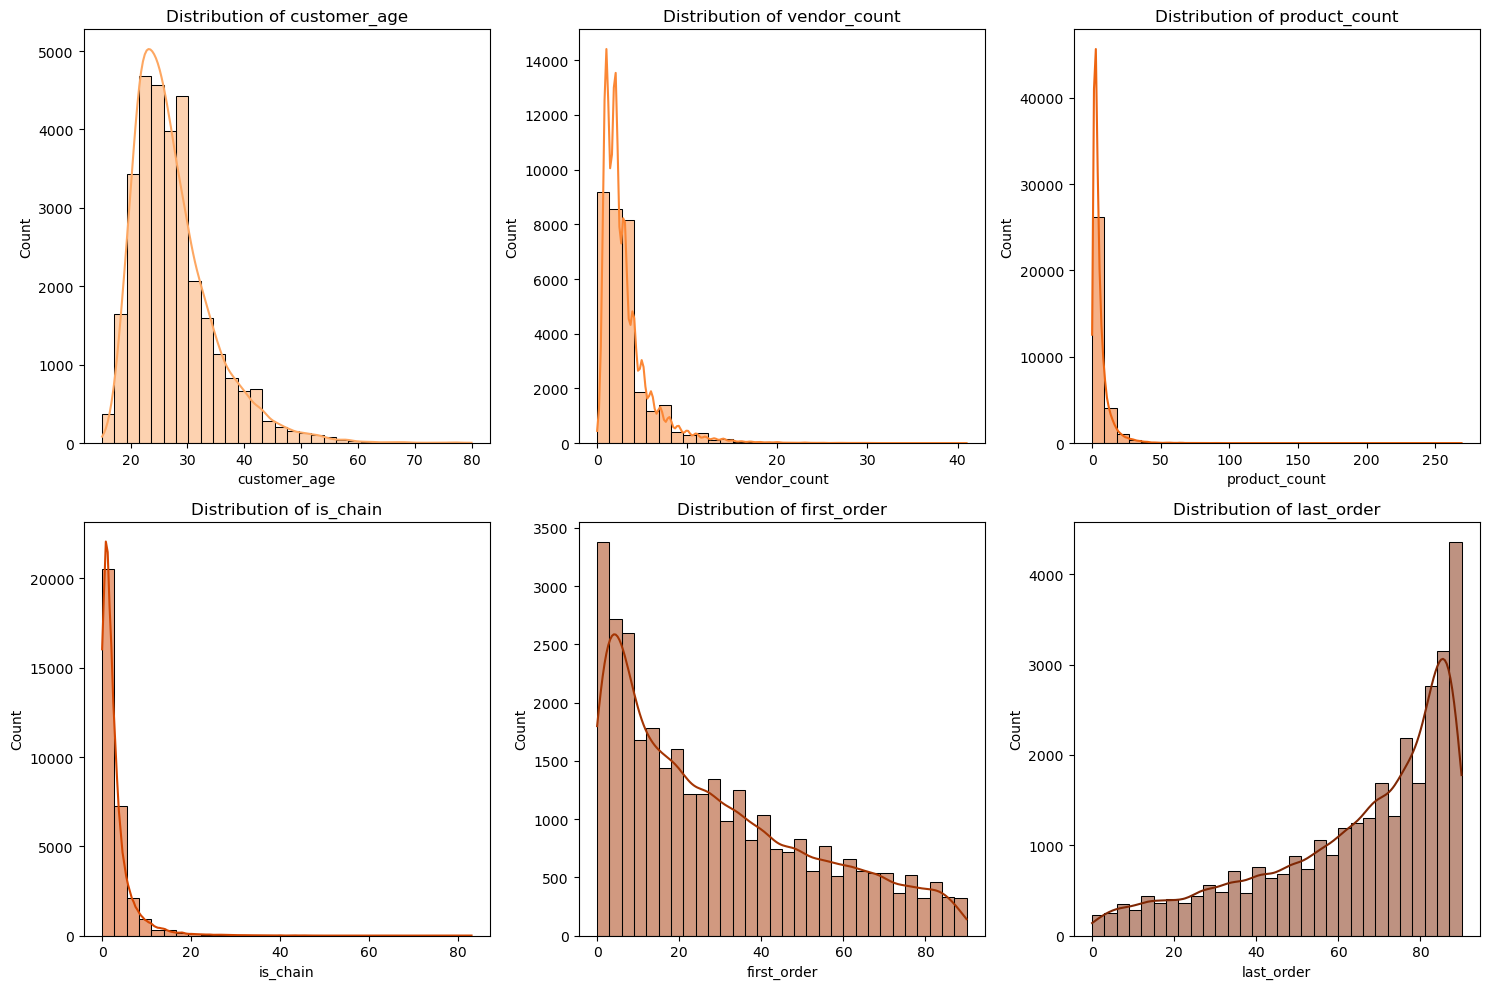

In [15]:
variables = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']
colors = plt.cm.Oranges(np.linspace(0.4, 1, len(variables)))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    if i < len(variables):
        sns.histplot(data[variables[i]], bins=30, kde=True, color=colors[i], ax=ax)
        ax.set_title(f"Distribution of {variables[i]}")
plt.tight_layout()
plt.show()

- **Cuisines' Histogram**

The histograms display the order frequency for different cuisine types, showcasing customer preferences across a wide variety of cuisines. This visualization helps identify the popularity of specific cuisines, which can be used to tailor offerings and recommendations.

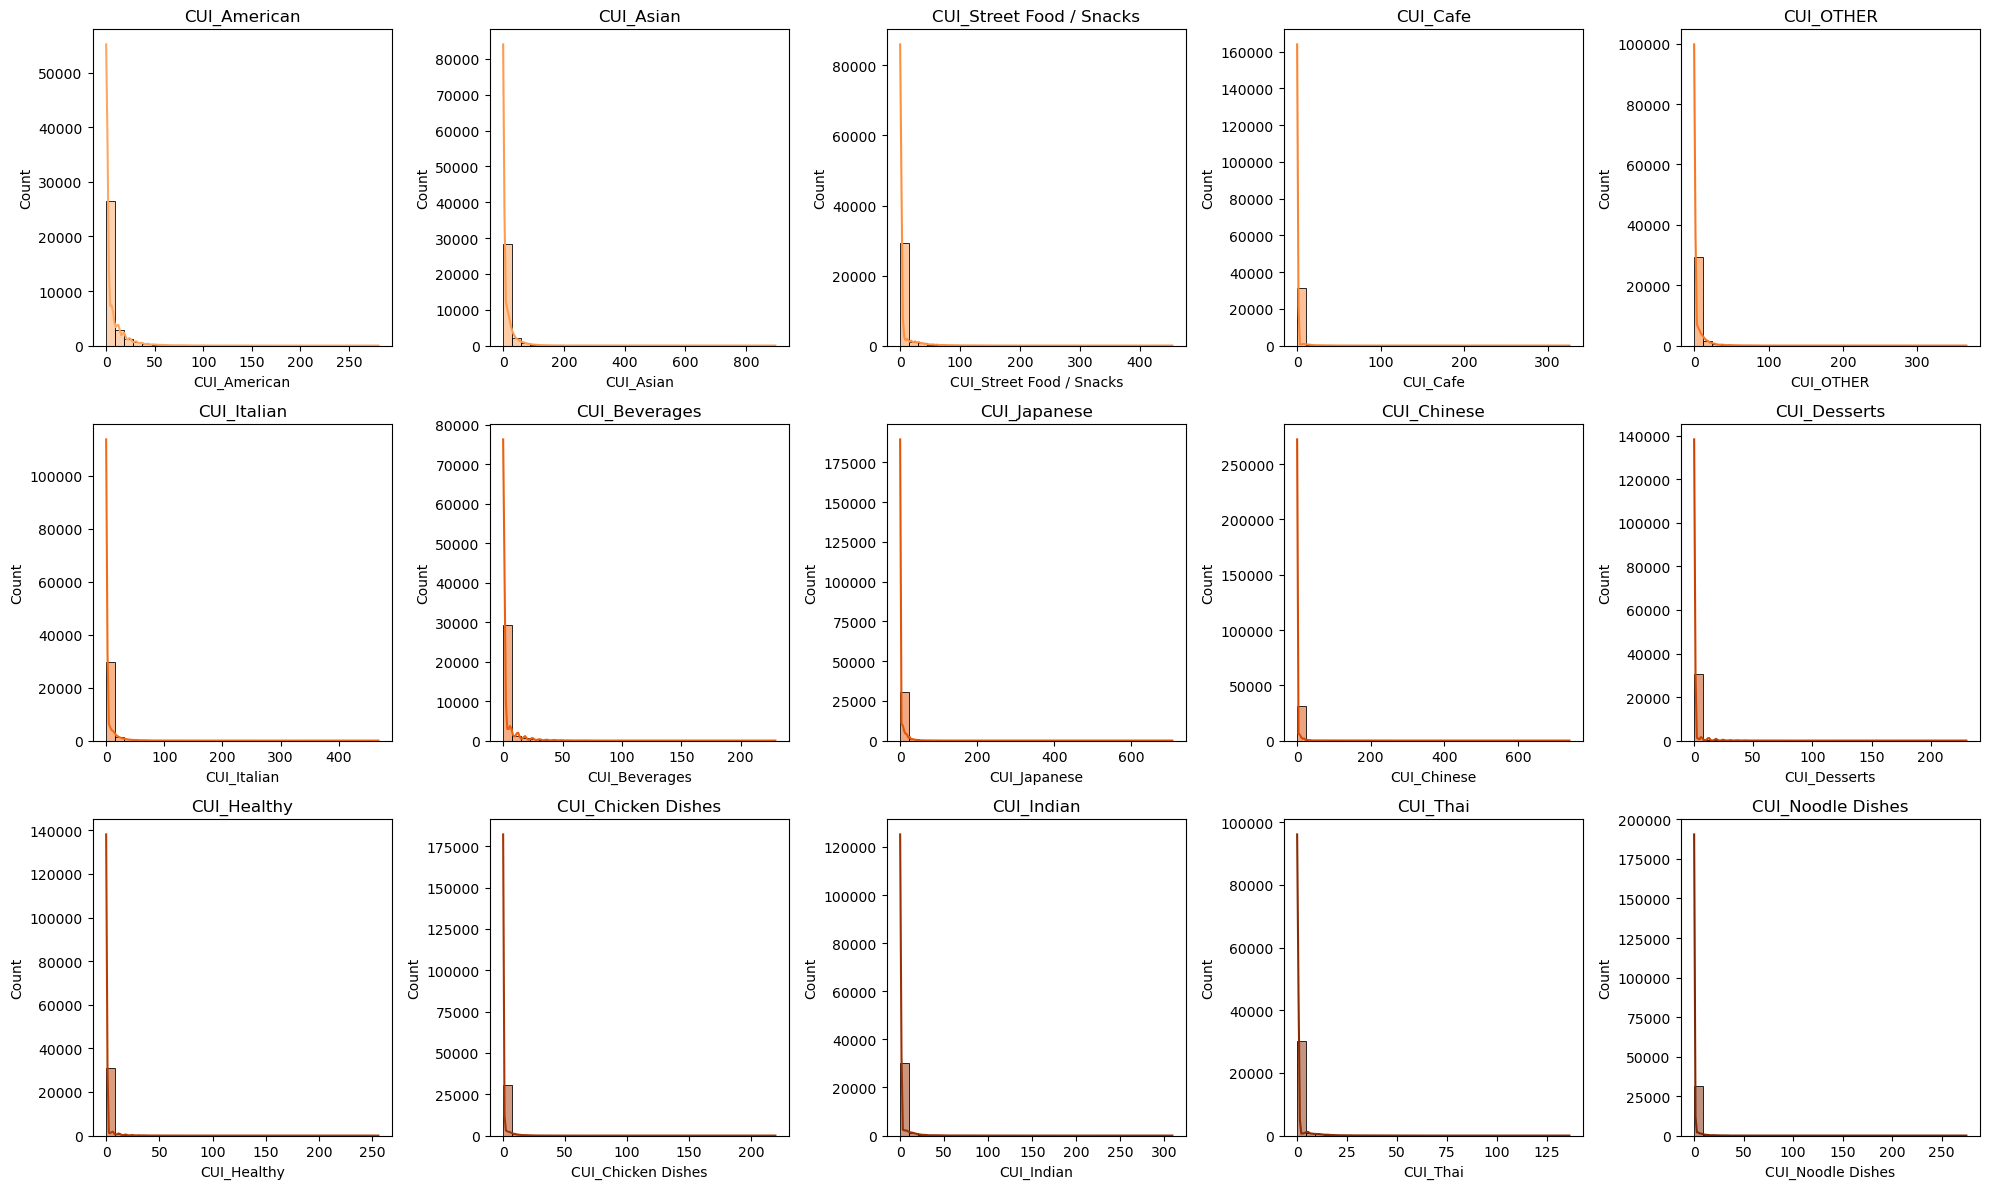

In [16]:
cuisines = [f'CUI_{i}' for i in ['American', 'Asian', 'Street Food / Snacks', 'Cafe', 'OTHER',
                                  'Italian', 'Beverages', 'Japanese', 'Chinese', 'Desserts',
                                  'Healthy', 'Chicken Dishes', 'Indian', 'Thai', 'Noodle Dishes']]

colors = plt.cm.Oranges(np.linspace(0.4, 1, len(cuisines)))

fig, axs = plt.subplots(3, 5, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    if i < len(cuisines):
        data_column = data.get(cuisines[i], np.random.randint(0, 100, 1000))
        sns.histplot(data_column, bins=30, kde=True, color=colors[i], ax=ax)
        ax.set_title(cuisines[i])
plt.tight_layout()
plt.show()

- **Days of the Week Histogram**

The histograms represent the order counts for each day of the week. By analyzing this data, we can uncover patterns in customer behavior, such as peak order days or weekdays with reduced activity, which is critical for operational planning.

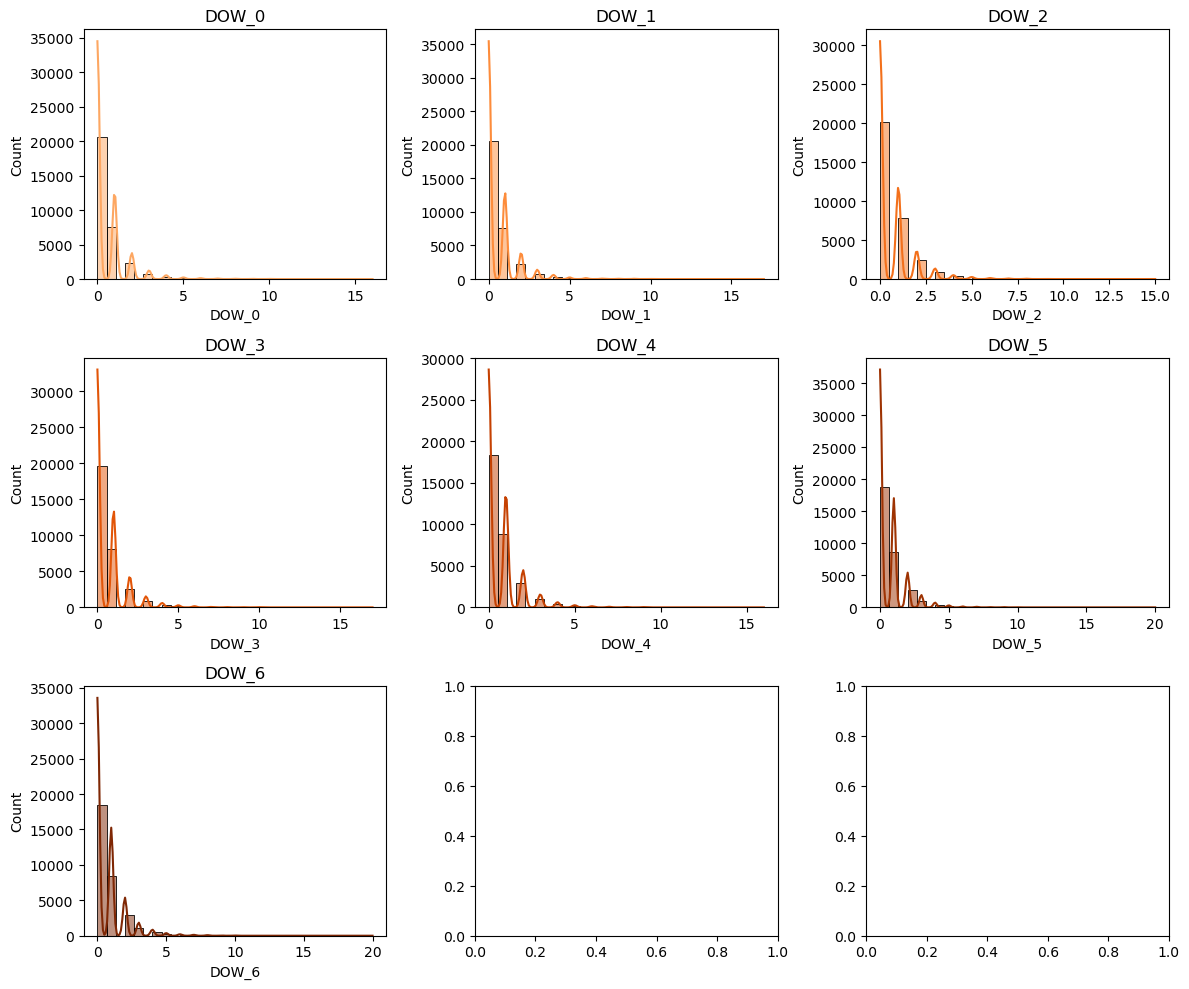

In [17]:
days_of_week = [f'DOW_{i}' for i in range(7)]
colors = plt.cm.Oranges(np.linspace(0.4, 1, len(days_of_week)))

fig, axs = plt.subplots(3, 3, figsize=(12, 10))
for i, ax in enumerate(axs.flat):
    if i < len(days_of_week):
        sns.histplot(data[days_of_week[i]], bins=30, kde=True, color=colors[i], ax=ax)
        ax.set_title(days_of_week[i])
plt.tight_layout()
plt.show()

- **Peak vs. Off-Peak Hours**

This bar chart compares the volume of orders during peak and off-peak hours. It provides a clear understanding of customer activity trends during different times of the day, supporting decisions in resource allocation and service optimization.

C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4072957747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, ax=ax, palette='Oranges')


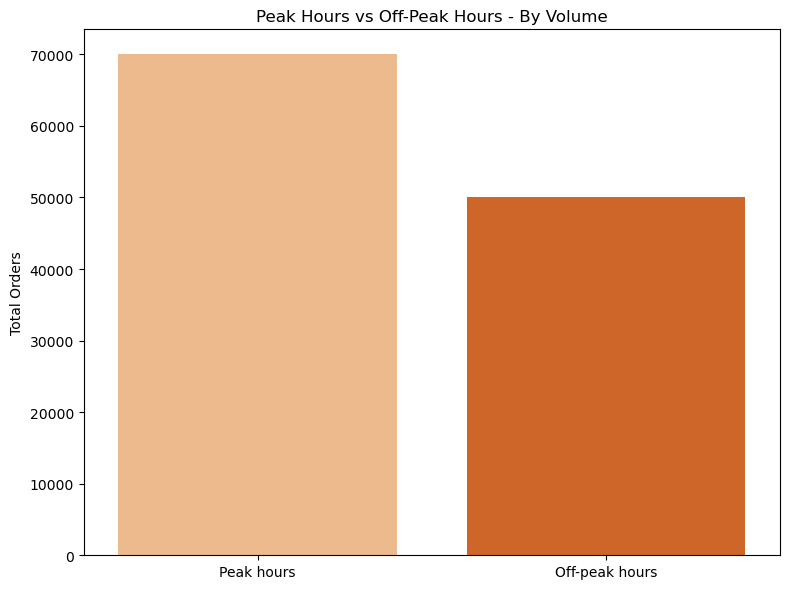

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
categories = ['Peak hours', 'Off-peak hours']
values = [70000, 50000]
sns.barplot(x=categories, y=values, ax=ax, palette='Oranges')
ax.set_title("Peak Hours vs Off-Peak Hours - By Volume")
ax.set_ylabel("Total Orders")
plt.tight_layout()
plt.show()

### Boxplots

By categorizing features such as customer demographics, time-based behaviors, and cuisine preferences, we can better identify patterns and anomalies in the data.

- **Numeric Variables' Boxplot**  

This boxplot showcases the distribution and spread of some key numeric variables such as `customer_age`, `vendor_count`, and `product_count`. It highlights outliers, medians, and interquartile ranges, enabling the identification of potential anomalies and understanding the data distribution.

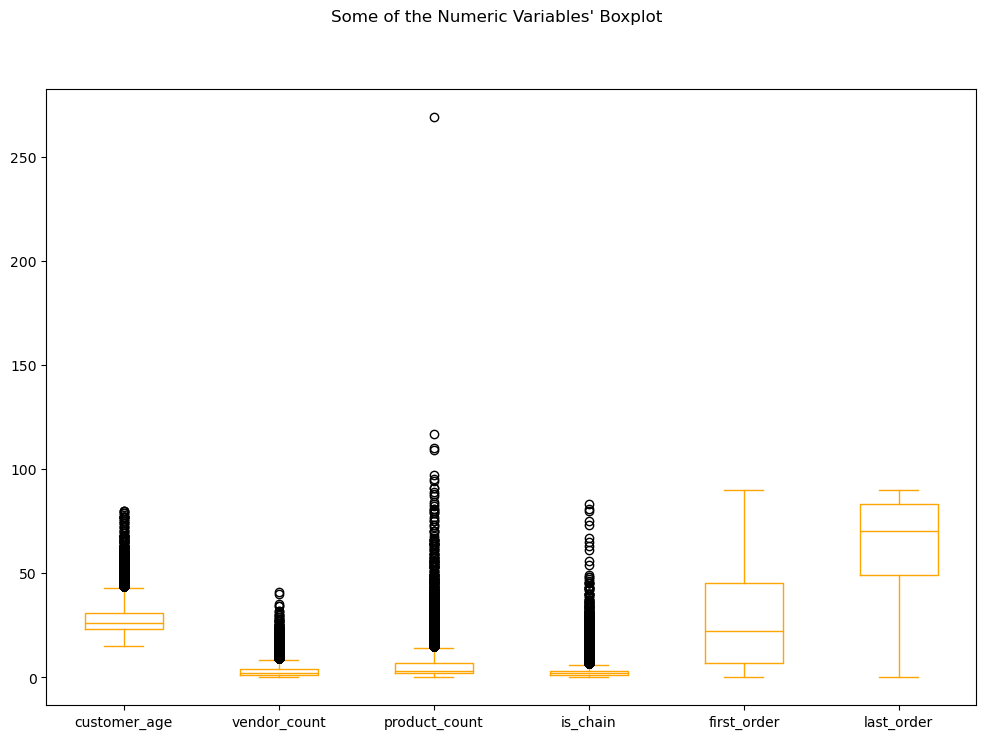

In [19]:
numeric_columns = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']
data[numeric_columns].plot(kind='box', figsize=(12, 8), color='orange')
plt.suptitle("Some of the Numeric Variables' Boxplot")
plt.show()

- **Cuisines' Boxplot**  

This boxplot visualizes the distribution of various cuisine types, highlighting differences in order volumes and outliers for cuisines like `CUI_Asian`, `CUI_Italian`, and `CUI_Street Food`. It provides valuable insights into customer preferences for specific cuisine categories.

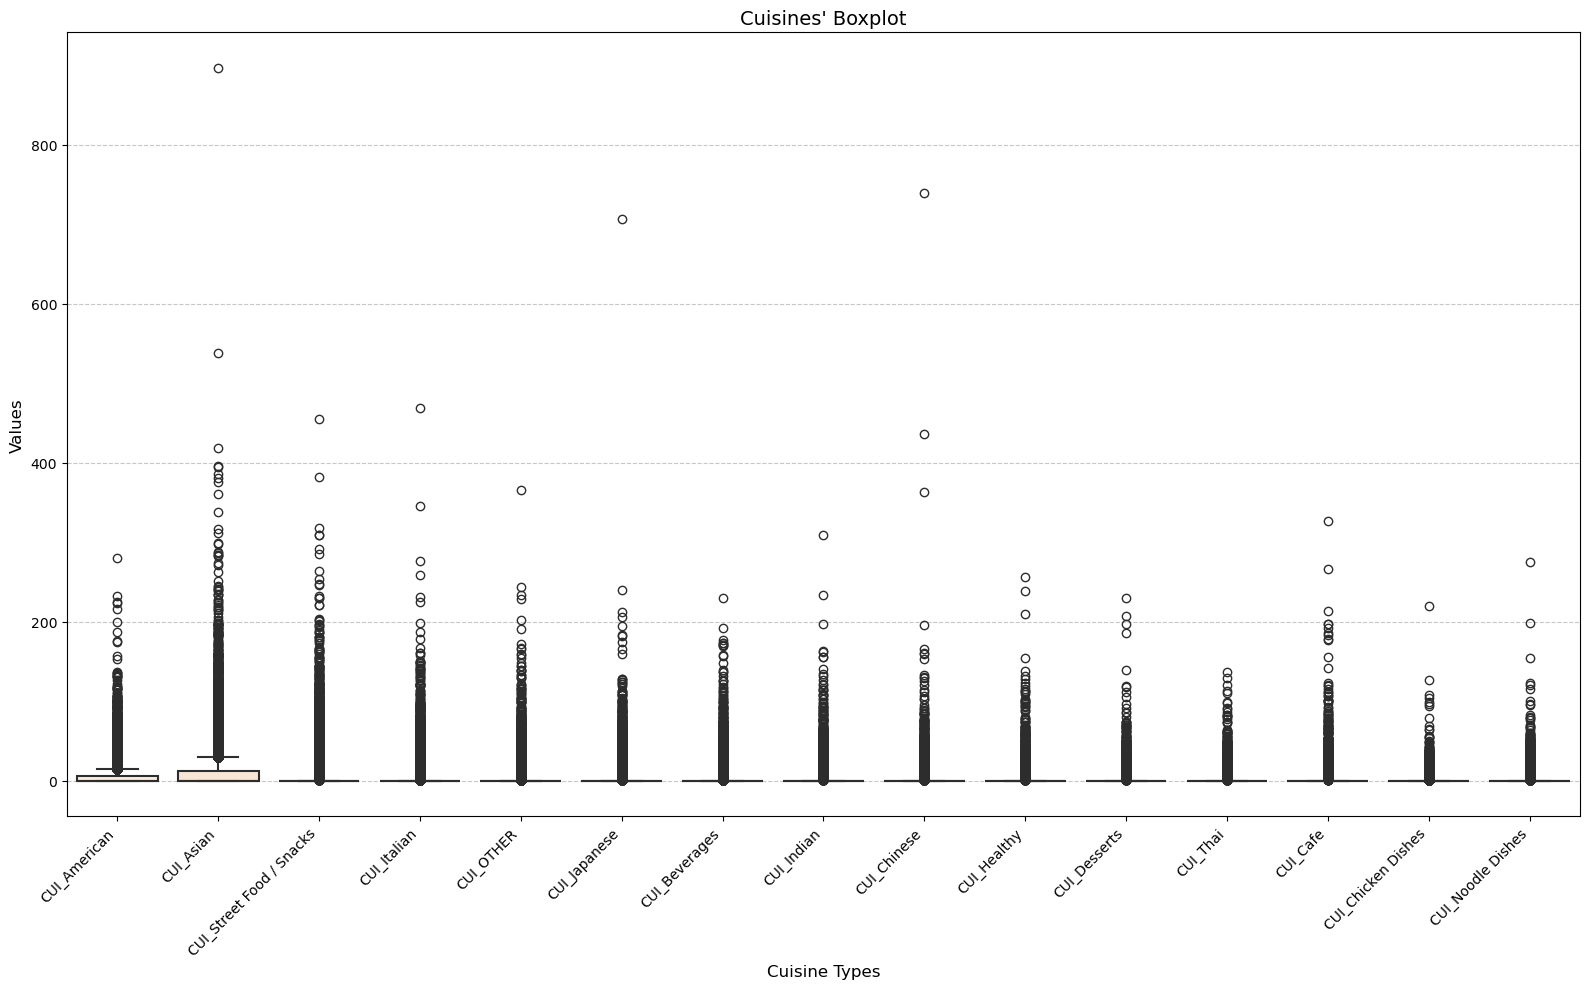

In [20]:
cuisine_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Street Food / Snacks', 'CUI_Italian', 'CUI_OTHER',
    'CUI_Japanese', 'CUI_Beverages', 'CUI_Indian', 'CUI_Chinese', 'CUI_Healthy',
    'CUI_Desserts', 'CUI_Thai', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Noodle Dishes'
]

plt.figure(figsize=(16, 10))
sns.boxplot(data=data[cuisine_columns], palette="Oranges", linewidth=1.5)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.title("Cuisines' Boxplot", fontsize=14)
plt.xlabel("Cuisine Types", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Days of the Week Boxplots**  

These boxplots illustrate the order distributions across days of the week. By showcasing medians, ranges, and outliers, this visualization helps identify trends in customer activity and preferred ordering days.

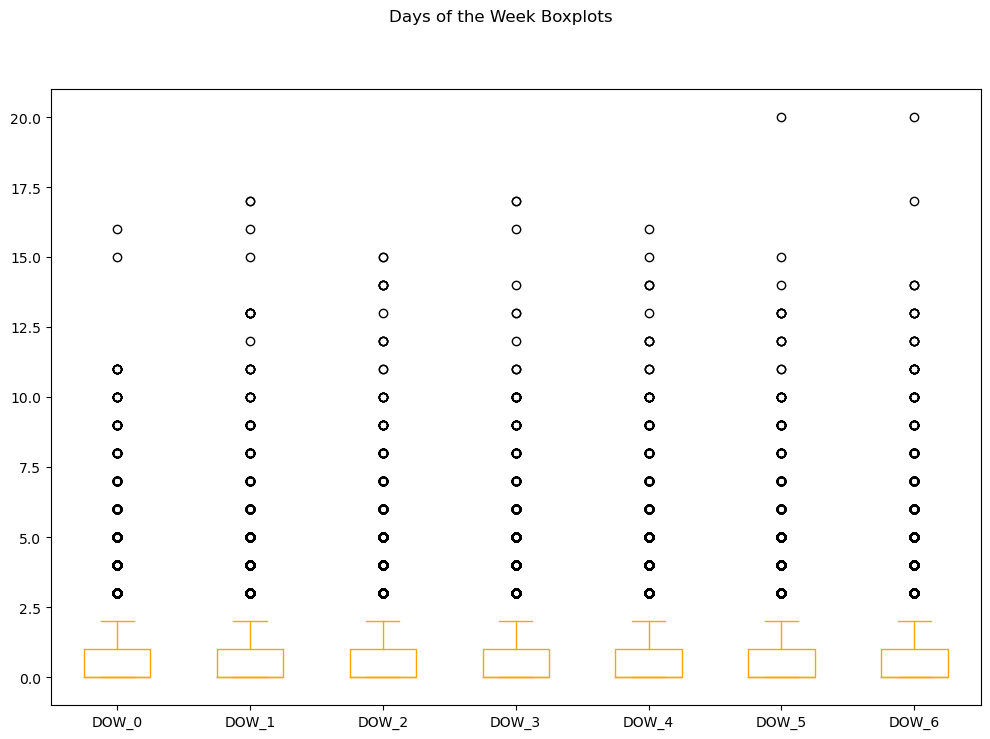

In [21]:
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
data[dow_columns].plot(kind='box', figsize=(12, 8), color='orange')
plt.suptitle("Days of the Week Boxplots")
plt.show()

- **Days of the Week Boxplots**  

These boxplots illustrate the order distributions across days of the week. By showcasing medians, ranges, and outliers, this visualization helps identify trends in customer activity and preferred ordering days.

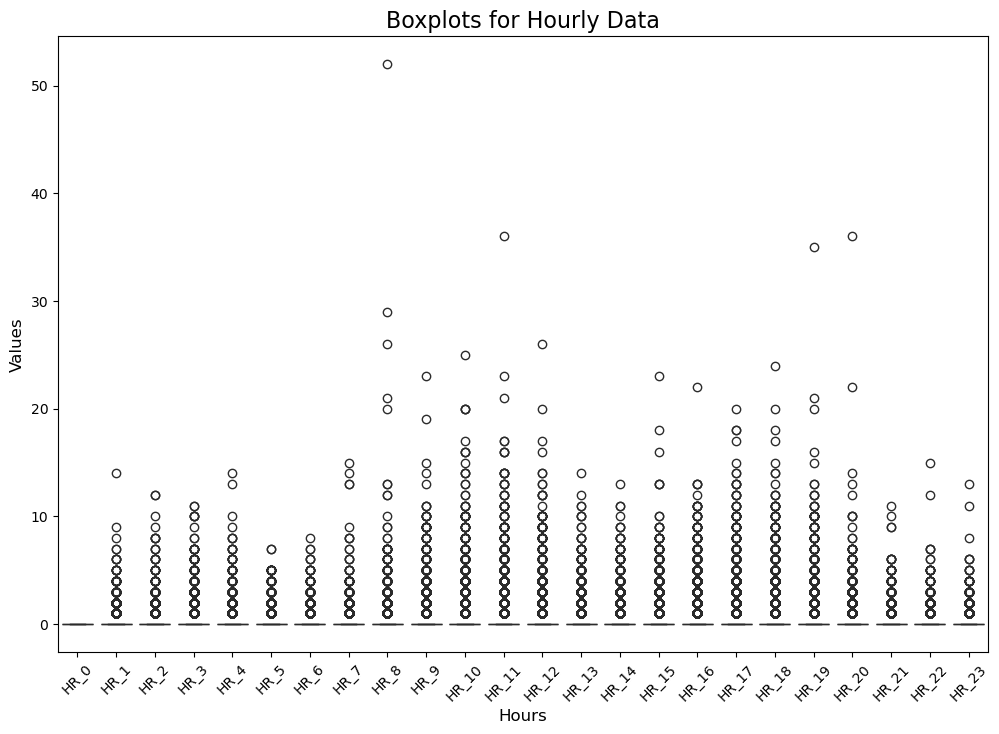

In [22]:
hr_columns = [f'HR_{i}' for i in range(24)]
palette = sns.color_palette("Oranges", len(hr_columns))

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[hr_columns], palette=palette)
plt.title("Boxplots for Hourly Data", fontsize=16)
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Barplots

- **Payment Method**

C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\1141241362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)


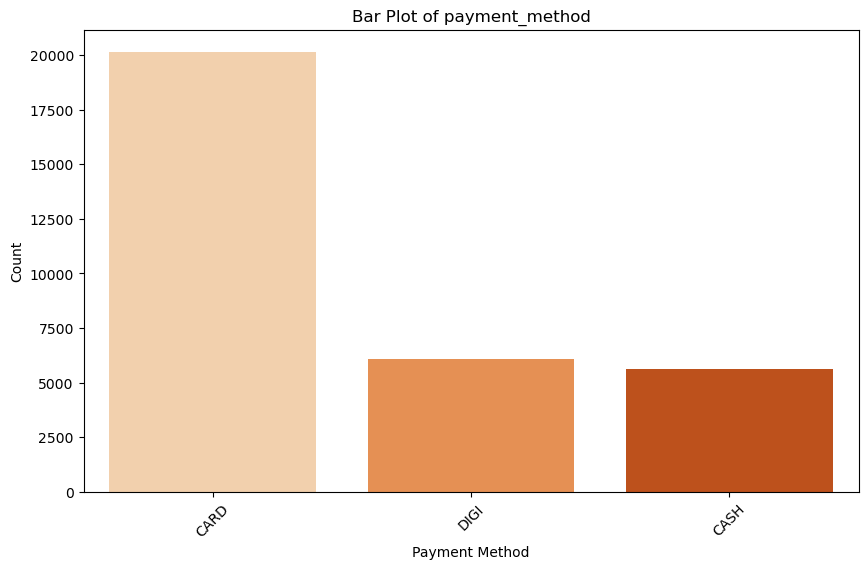

In [23]:
value_counts = data['payment_method'].value_counts()
colors = sns.color_palette("Oranges", len(value_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
plt.title('Bar Plot of payment_method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- **Customer Region**

C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\1771724915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\1771724915.py:4: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)


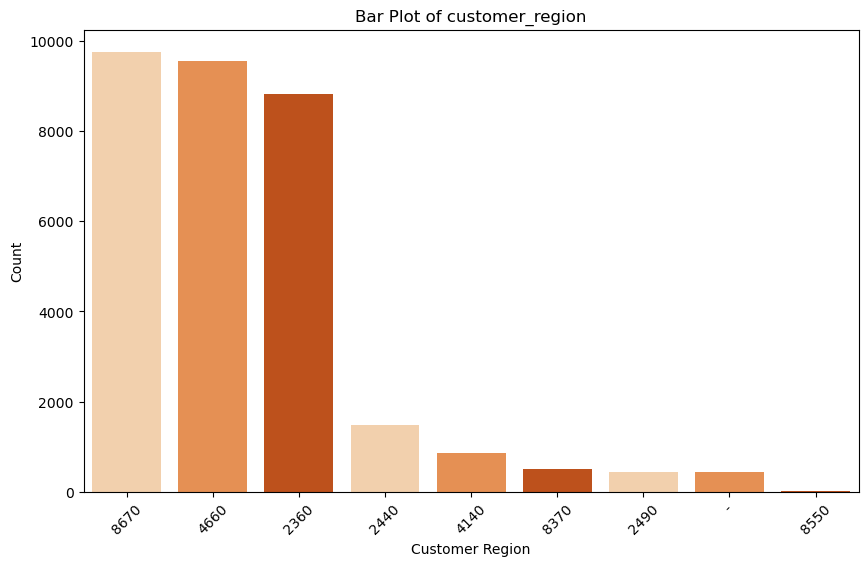

In [24]:
value_counts = data['customer_region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
plt.title('Bar Plot of customer_region')
plt.xlabel('Customer Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Categorical Variables

Bar plots are used to display the frequency distribution of categorical variables, helping identify dominant or underrepresented categories.

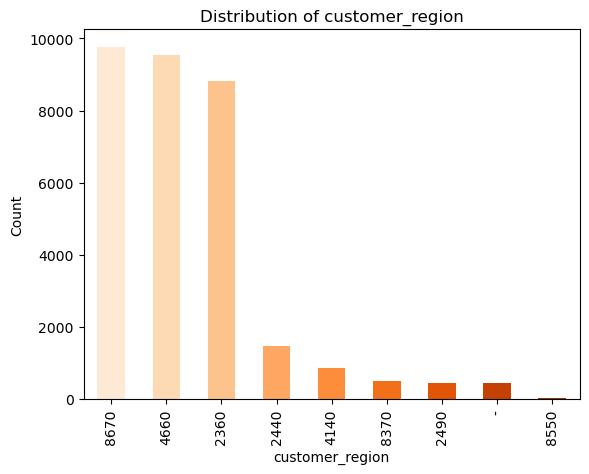

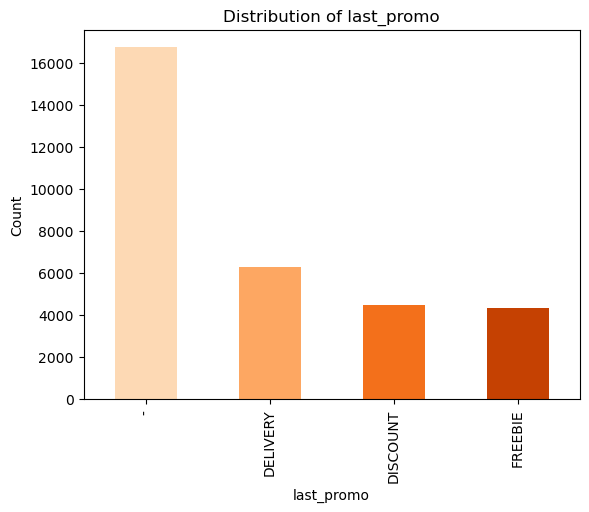

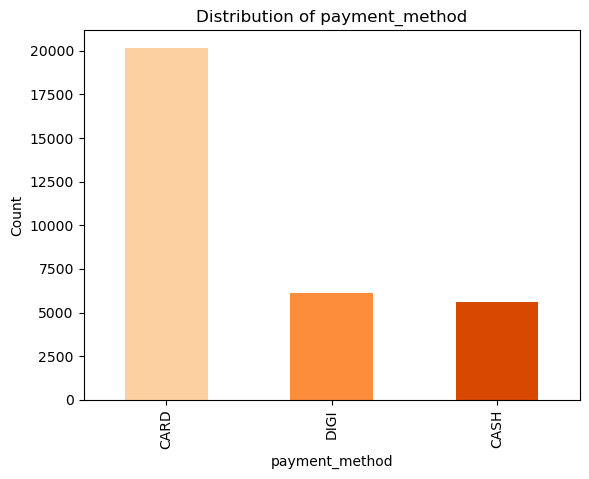

In [25]:
for var in category_var:
    value_counts = data[var].value_counts()
    colors = sns.color_palette("Oranges", len(value_counts))
    value_counts.plot(kind='bar', 
                      title=f"Distribution of {var}", 
                      color=colors)
    plt.ylabel("Count")
    plt.show()

### Correlation Analysis

**1. Correlation between numeric features**

A heatmap is used to visualize the correlation matrix of numerical variables, highlighting strong positive or negative correlations. 

This helps identify relationships between variables that may influence the analysis.

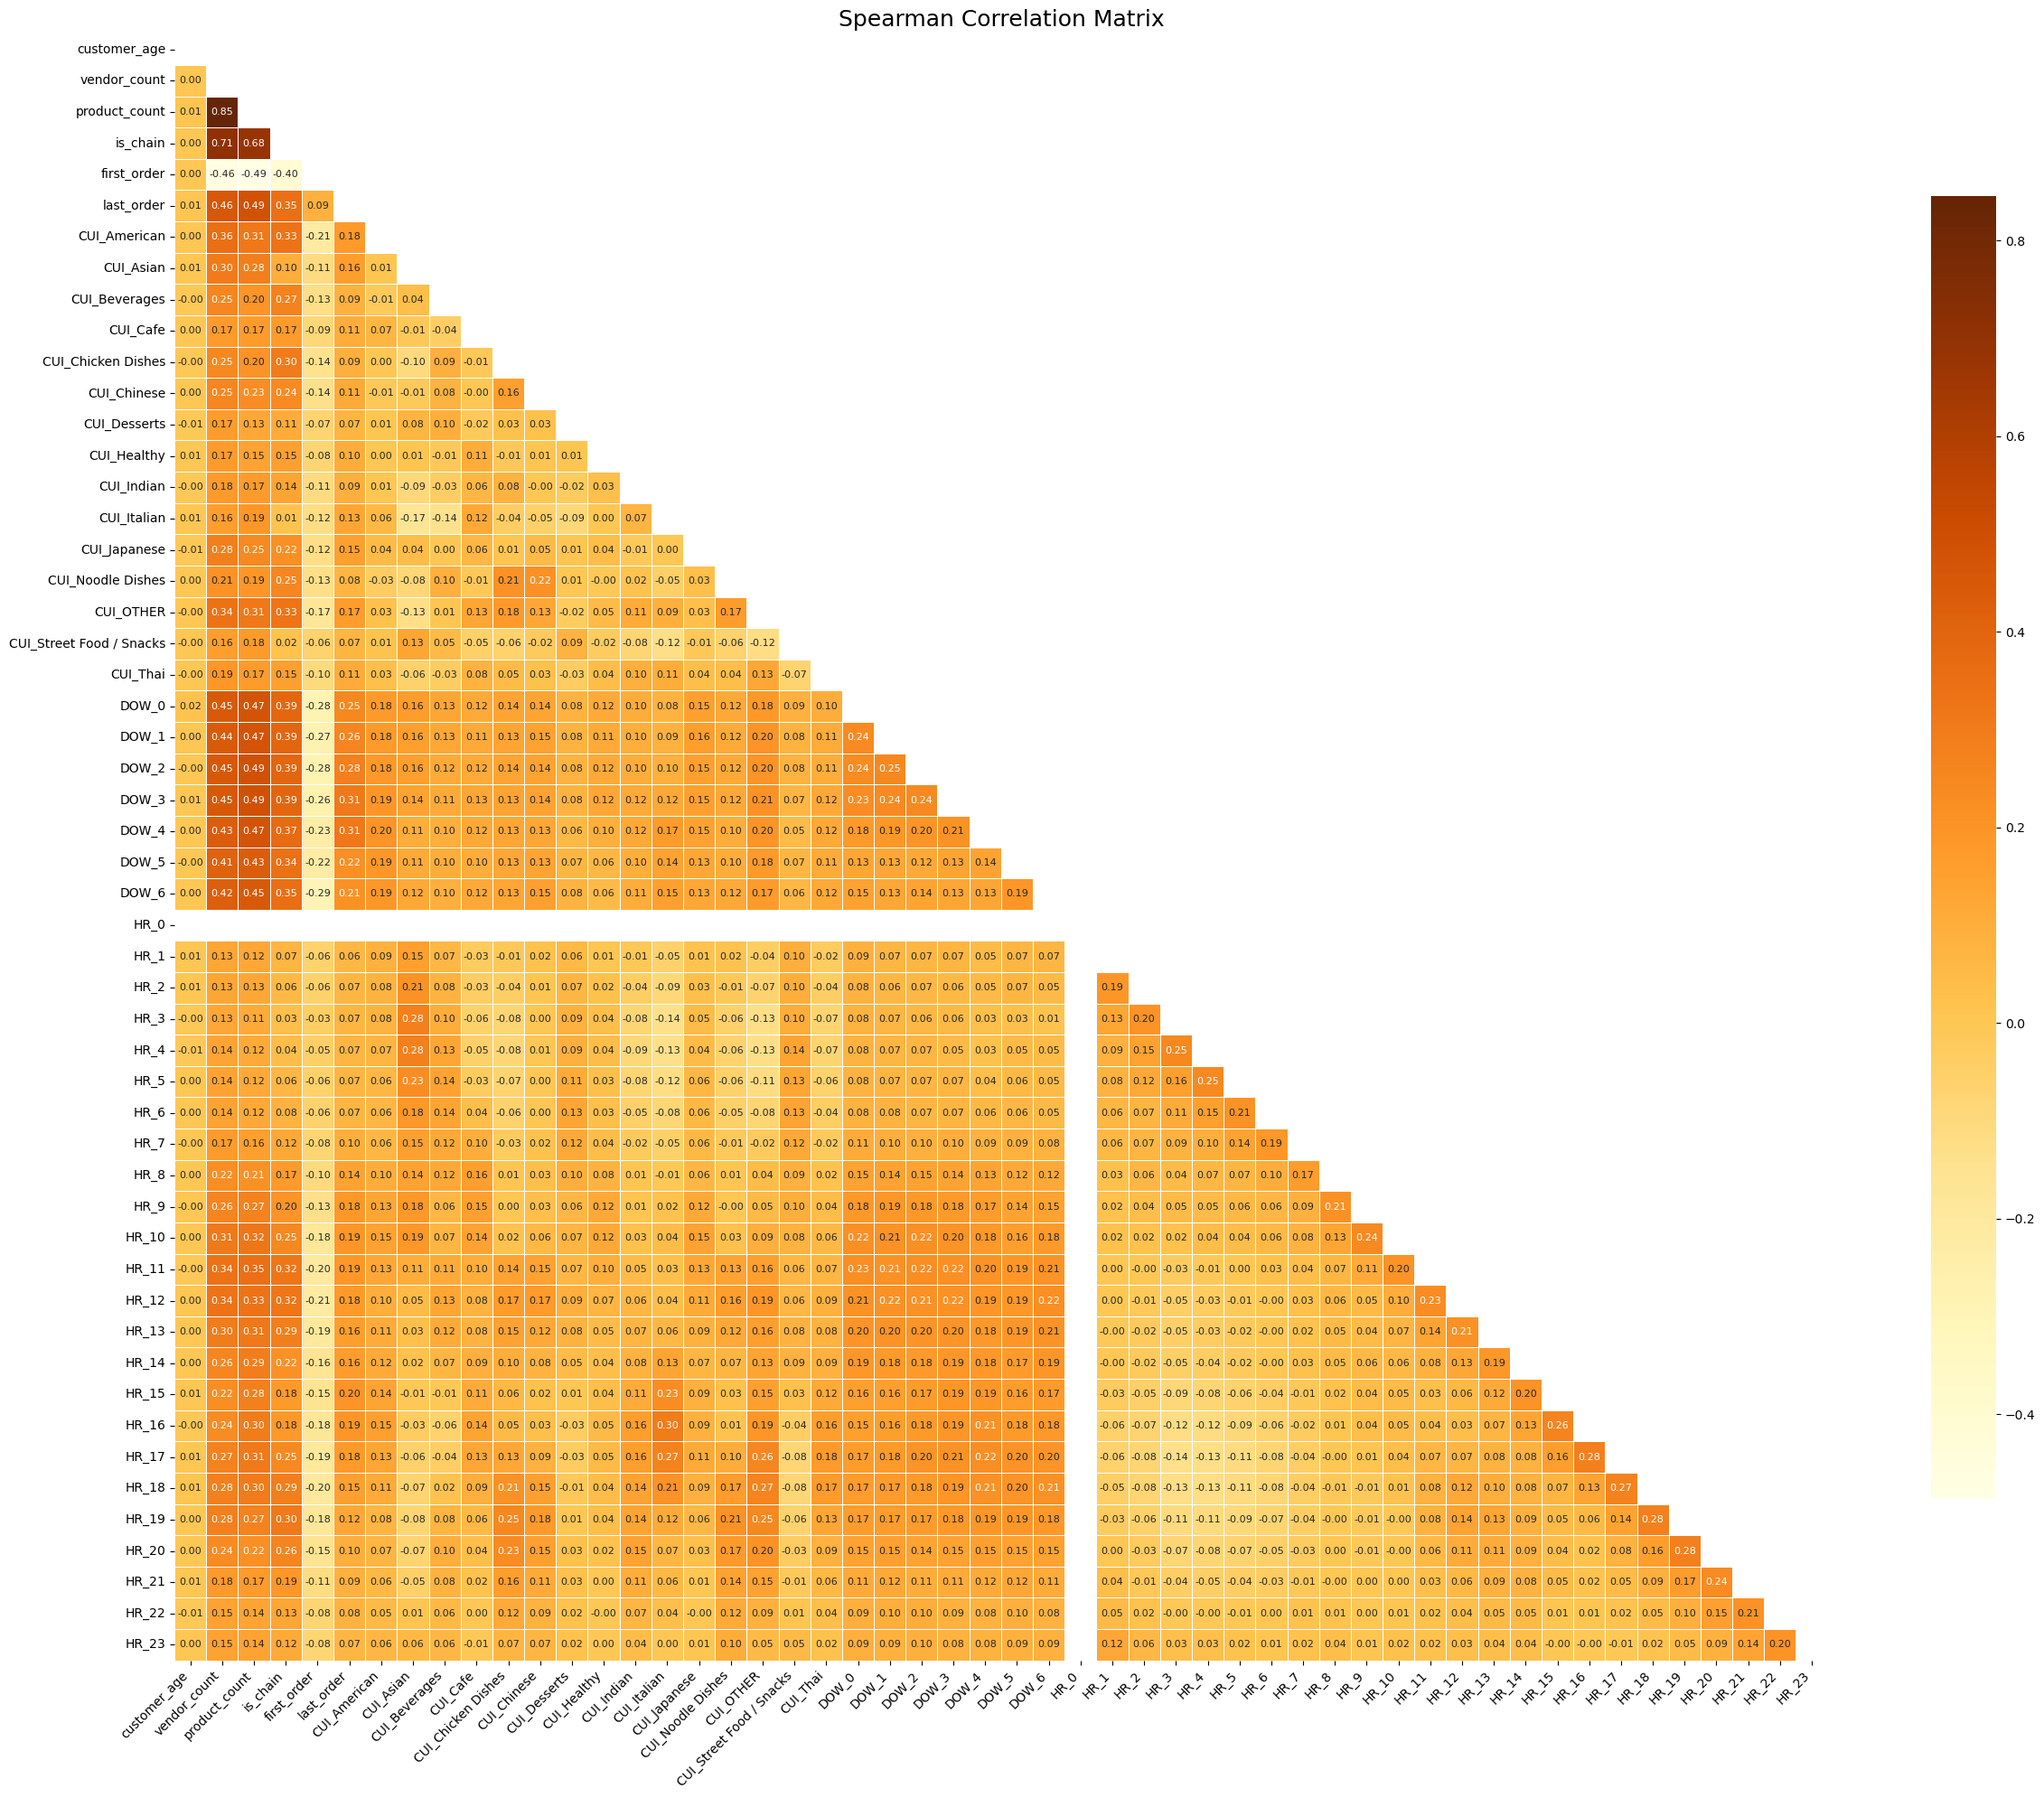

In [26]:
correlation_matrix = data[number_var].corr(method='spearman')

plt.figure(figsize=(25, 20))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlOrBr",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    annot_kws={"size": 8},
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
)
plt.title("Spearman Correlation Matrix", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

**2. Table Correlation**

This section extracts and lists pairs of variables with high correlations (greater than 0.8 or less than -0.8) from the correlation matrix. 

The resulting table offers a focused view of significant variable interactions.

In [27]:
correlation_matrix = data[number_var].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8 or abs(correlation_matrix.iloc[i, j]) < -0.8: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation
0,product_count,vendor_count,0.827636
1,is_chain,product_count,0.827071


**3. Correlation between categorical features (Cramers V)**

Cramér's V is calculated to measure the association between categorical variables. 

This helps assess the dependency between categories and their potential impact on the analysis.

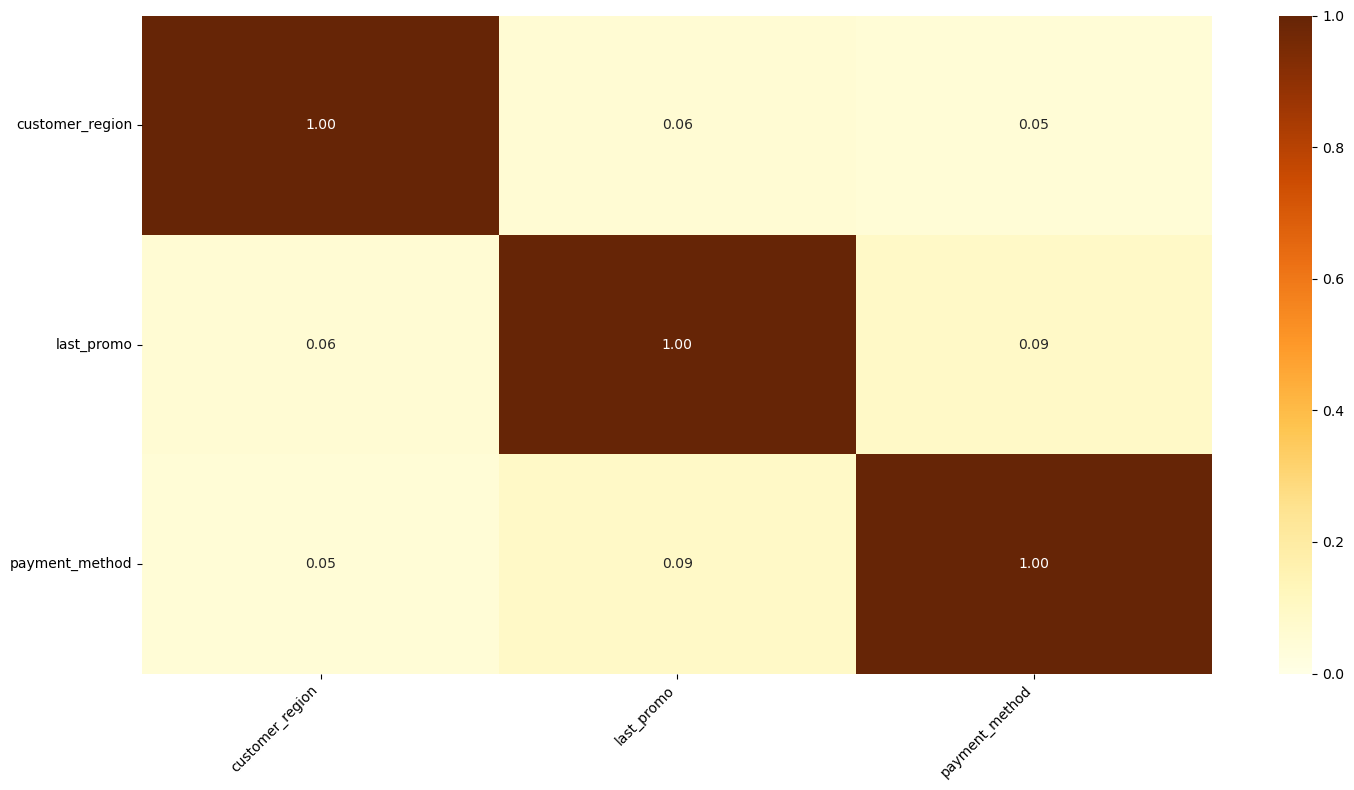

In [28]:
assert all(col in data.columns for col in category_var), "Some columns are missing in data"

def cramers_v(x, y):
    contingency_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum().sum()
    r, k = contingency_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

correlation_matrix = pd.DataFrame(index=category_var, columns=category_var)

for col1 in category_var:
    for col2 in category_var:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(
                data[col1].round(3),
                data[col2].round(3)
            )

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix,annot=True, fmt=".2f",cmap="YlOrBr",vmin=0, vmax=1,cbar=True,)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 1.4 Trend Analysis

In this section, we identify key trends within the dataset. 

The analysis includes examining customer orders by day of the week and understanding spending behavior across various cuisine types. 

By visualizing these patterns, we gain valuable insights into customer preferences and behaviors over time, aiding in segmentation and targeting strategies.

[⬆️ Back to Top](#top)

- **Orders by Day of the Week**

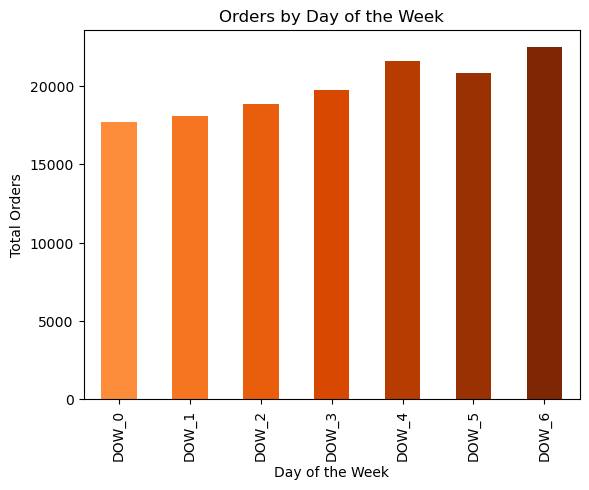

In [29]:
dow_data = data[[f'DOW_{i}' for i in range(7)]].sum()
dow_data.plot(kind='bar', title="Orders by Day of the Week", color=plt.cm.Oranges(np.linspace(0.5, 1, len(dow_data))))
plt.xlabel("Day of the Week")
plt.ylabel("Total Orders")
plt.show()

- **Average Spending by Cuisine Type**

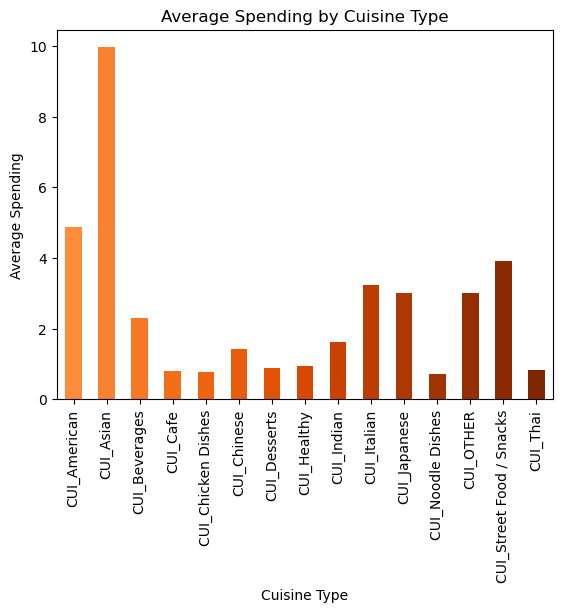

In [30]:
cuisine_data = data[[col for col in number_var if 'CUI_' in col]].mean()
cuisine_data.plot(kind='bar', title="Average Spending by Cuisine Type", color=plt.cm.Oranges(np.linspace(0.5, 1, len(cuisine_data))))
plt.xlabel("Cuisine Type")
plt.ylabel("Average Spending")
plt.show()

- **Relation between Is_Chain and Vendor_Count**

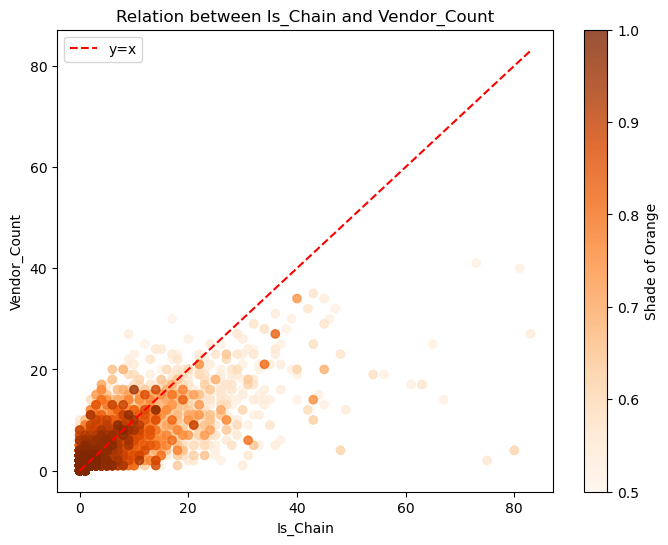

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(data['is_chain'], data['vendor_count'], c=np.linspace(0.5, 1, len(data)), cmap='Oranges', alpha=0.8)
plt.plot([0, data['is_chain'].max()], [0, data['is_chain'].max()], color='red', linestyle='--', label='y=x')
plt.title('Relation between Is_Chain and Vendor_Count')
plt.xlabel('Is_Chain')
plt.ylabel('Vendor_Count')
plt.legend()
plt.colorbar(label='Shade of Orange')
plt.show()

- **Relation between Is_Chain and Product_Count**

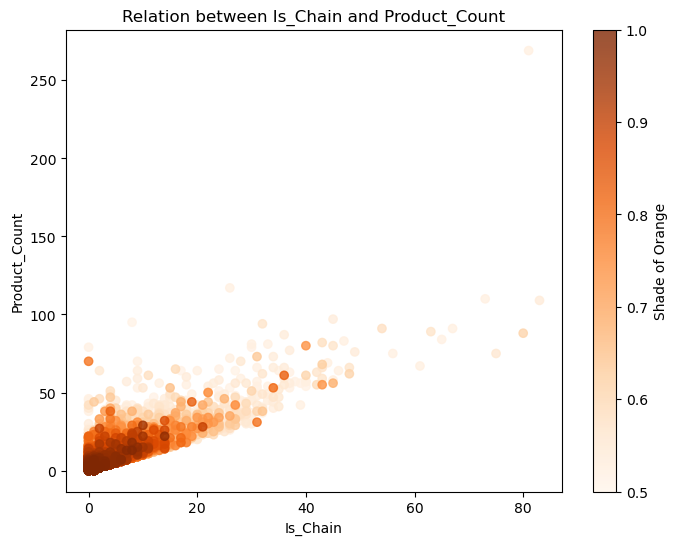

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(data['is_chain'], data['product_count'], c=np.linspace(0.5, 1, len(data)), cmap='Oranges', alpha=0.8)
plt.title('Relation between Is_Chain and Product_Count')
plt.xlabel('Is_Chain')
plt.ylabel('Product_Count')
plt.colorbar(label='Shade of Orange')
plt.show()

# 2. Preprocessing

Efficient data preprocessing ensures the dataset is clean and ready for analysis. 

This part focuses on standardizing data types, handling duplicates, and addressing missing values to maintain data quality and integrity.

[⬆️ Back to Top](#top)

In [33]:
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['customer_region'] = data['customer_region'].astype('category')
data['customer_age'] = data['customer_age'].fillna(0).astype('int64')

## Duplicated Values Treatment

Here, we identify and remove any duplicated rows in the dataset. 

This step ensures that each record is unique and avoids double-counting during analysis.

In [34]:
duplicates = data[data.index.duplicated(keep=False)]

if not duplicates.empty:
    print(duplicates)

            customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
b55012ee1c             8550            23             4             11   
b55012ee1c             8550            23             4             11   
24251eb7da             8550            28             4              8   
24251eb7da             8550            28             4              8   
671bf0c738             8550            25             4              7   
671bf0c738             8550            25             4              7   
742ca068fc             8550            20             1              2   
742ca068fc             8550            20             1              2   
df91183978             8550            23             2              3   
df91183978             8550            23             2              3   
6bbf5f74cd             8550            22            10             20   
6bbf5f74cd             8550           

In [35]:
data = data[~data.index.duplicated(keep='first')]

print(f"New number of lines in the dataset: {len(data)}")

New number of lines in the dataset: 31875


## Missing Values Treatment

The dataset is checked for missing values, which could hinder analysis. Identifying these gaps helps prepare for imputation.

In [36]:
data.isnull().sum()

customer_region                0
customer_age                   0
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

## Impute the Missing Values (KNN)

We employ the K-Nearest Neighbors (KNN) imputation method to fill missing values in numerical features. 

This technique estimates the missing values based on the closest neighbors, ensuring a more accurate completion of the dataset.

In [37]:
knn_imputer = KNNImputer(n_neighbors=5)
data[number_var] = knn_imputer.fit_transform(data[number_var])
print(data.isnull().sum())

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

# 2.1 Outliers

In this step, we use Z-scores to identify outliers in our numerical variables. 

A Z-score greater than 3 (or less than -3) indicates a potential outlier. 

[⬆️ Back to Top](#top)

In [38]:
z_scores = data[number_var].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers per variable:")
print(outliers)

Outliers per variable:
customer_age                1048
vendor_count                 623
product_count                624
is_chain                     604
first_order                    0
last_order                     0
CUI_American                 634
CUI_Asian                    617
CUI_Beverages                589
CUI_Cafe                     344
CUI_Chicken Dishes           549
CUI_Chinese                  374
CUI_Desserts                 617
CUI_Healthy                  462
CUI_Indian                   527
CUI_Italian                  559
CUI_Japanese                 544
CUI_Noodle Dishes            433
CUI_OTHER                    556
CUI_Street Food / Snacks     642
CUI_Thai                     562
DOW_0                        657
DOW_1                        685
DOW_2                        694
DOW_3                        743
DOW_4                        777
DOW_5                        727
DOW_6                        486
HR_0                           0
HR_1                

## Outliers Removal

Using the interquartile range (IQR) method, we handle outliers by replacing extreme values beyond the defined bounds (lower and upper) with `NaN`. 

In [39]:
features_to_outlier = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                       'CUI_Chicken Dishes','CUI_Chinese','CUI_Desserts','CUI_Healthy','CUI_Indian','CUI_Italian','CUI_Japanese','CUI_Noodle Dishes','CUI_OTHER',
                       'CUI_Street Food / Snacks','CUI_Thai','DOW_0','DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']

In [40]:
def outliers_removal(data, number_var):
    for col in number_var:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].where((data[col] >= lower_bound) & (data[col] <= upper_bound), np.nan)
        
    return data

In [41]:
outliers_removal(data, features_to_outlier)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2.0,5.0,1.0,0.0,1.0,DELIVERY,DIGI,0.00,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5d272b9dcb,8670,17.0,2.0,2.0,2.0,0.0,1.0,DISCOUNT,DIGI,12.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6d1b2ba63,4660,38.0,1.0,2.0,2.0,0.0,1.0,DISCOUNT,CASH,9.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180c632ed8,4660,NaN,2.0,3.0,1.0,0.0,2.0,DELIVERY,DIGI,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4eb37a6705,4660,20.0,2.0,5.0,0.0,0.0,2.0,-,DIGI,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1.0,1.0,1.0,3.0,0.0,FREEBIE,DIGI,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6b6709018,8670,NaN,1.0,1.0,0.0,5.6,0.0,DELIVERY,DIGI,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f74ad8ce3f,8670,24.0,1.0,1.0,1.0,5.6,0.0,-,DIGI,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(data.isnull().sum())

customer_region                0
customer_age                1653
vendor_count                1523
product_count               2370
is_chain                    3154
first_order                    0
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                3507
CUI_Asian                   3472
CUI_Beverages               5431
CUI_Cafe                    1366
CUI_Chicken Dishes          3248
CUI_Chinese                 3522
CUI_Desserts                2016
CUI_Healthy                 2169
CUI_Indian                  3448
CUI_Italian                 6448
CUI_Japanese                6300
CUI_Noodle Dishes           2226
CUI_OTHER                   7041
CUI_Street Food / Snacks    4244
CUI_Thai                    2378
DOW_0                       1405
DOW_1                       1495
DOW_2                       1587
DOW_3                       1653
DOW_4                       1784
DOW_5                       1707
DOW_6     

## Missing Values Treatment after Outlier removal

After marking outliers as `NaN`, we reapply the KNN imputation to fill the missing values introduced during the outlier removal process.

In [43]:
data[number_var] = knn_imputer.fit_transform(data[number_var])
print(data.isnull().sum())

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

## Outliers Check After Treatment

After treating outliers, we conduct a final check to visualize the treated variables using grouped boxplots. 

This step ensures that outlier handling has been effectively applied and the variables are ready for subsequent analysis.

In [44]:
def detect_outliers_iqr(df, missing_threshold=5):
    results = {'columns_with_outliers': [], 'outlier_counts': {}, 'bounds': {}}

    groups = {
        'Cuisines': cuisine_columns,
        'Days of the Week': dow_columns,
        'Hours of the Day': hr_columns,
        'Other Features': ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']
    }

    for group_name, columns in groups.items():
        num_cols = len(columns)
        cols_per_row = 4
        rows = -(-num_cols // cols_per_row)
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, rows * 4))
        axes = axes.flatten()

        for i, column in enumerate(columns):
            if column in df.select_dtypes(include=[np.number]).columns:
                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
                outlier_percent = len(outlier_data) / len(df) * 100

                results['bounds'][column] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
                results['outlier_counts'][column] = len(outlier_data)
                if outlier_percent > missing_threshold:
                    results['columns_with_outliers'].append(column)

                sns.boxplot(data=df, x=column, color='orange', ax=axes[i], showfliers=False)
                sns.stripplot(data=outlier_data, x=column, color='red', jitter=True, ax=axes[i])
                axes[i].set_title(f"{column}")

        for j in range(len(columns), len(axes)):
            fig.delaxes(axes[j])

        plt.suptitle(f"Boxplots with Outliers for {group_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    print("Columns with more than {}% outliers:".format(missing_threshold))
    print(results['columns_with_outliers'])

    return results

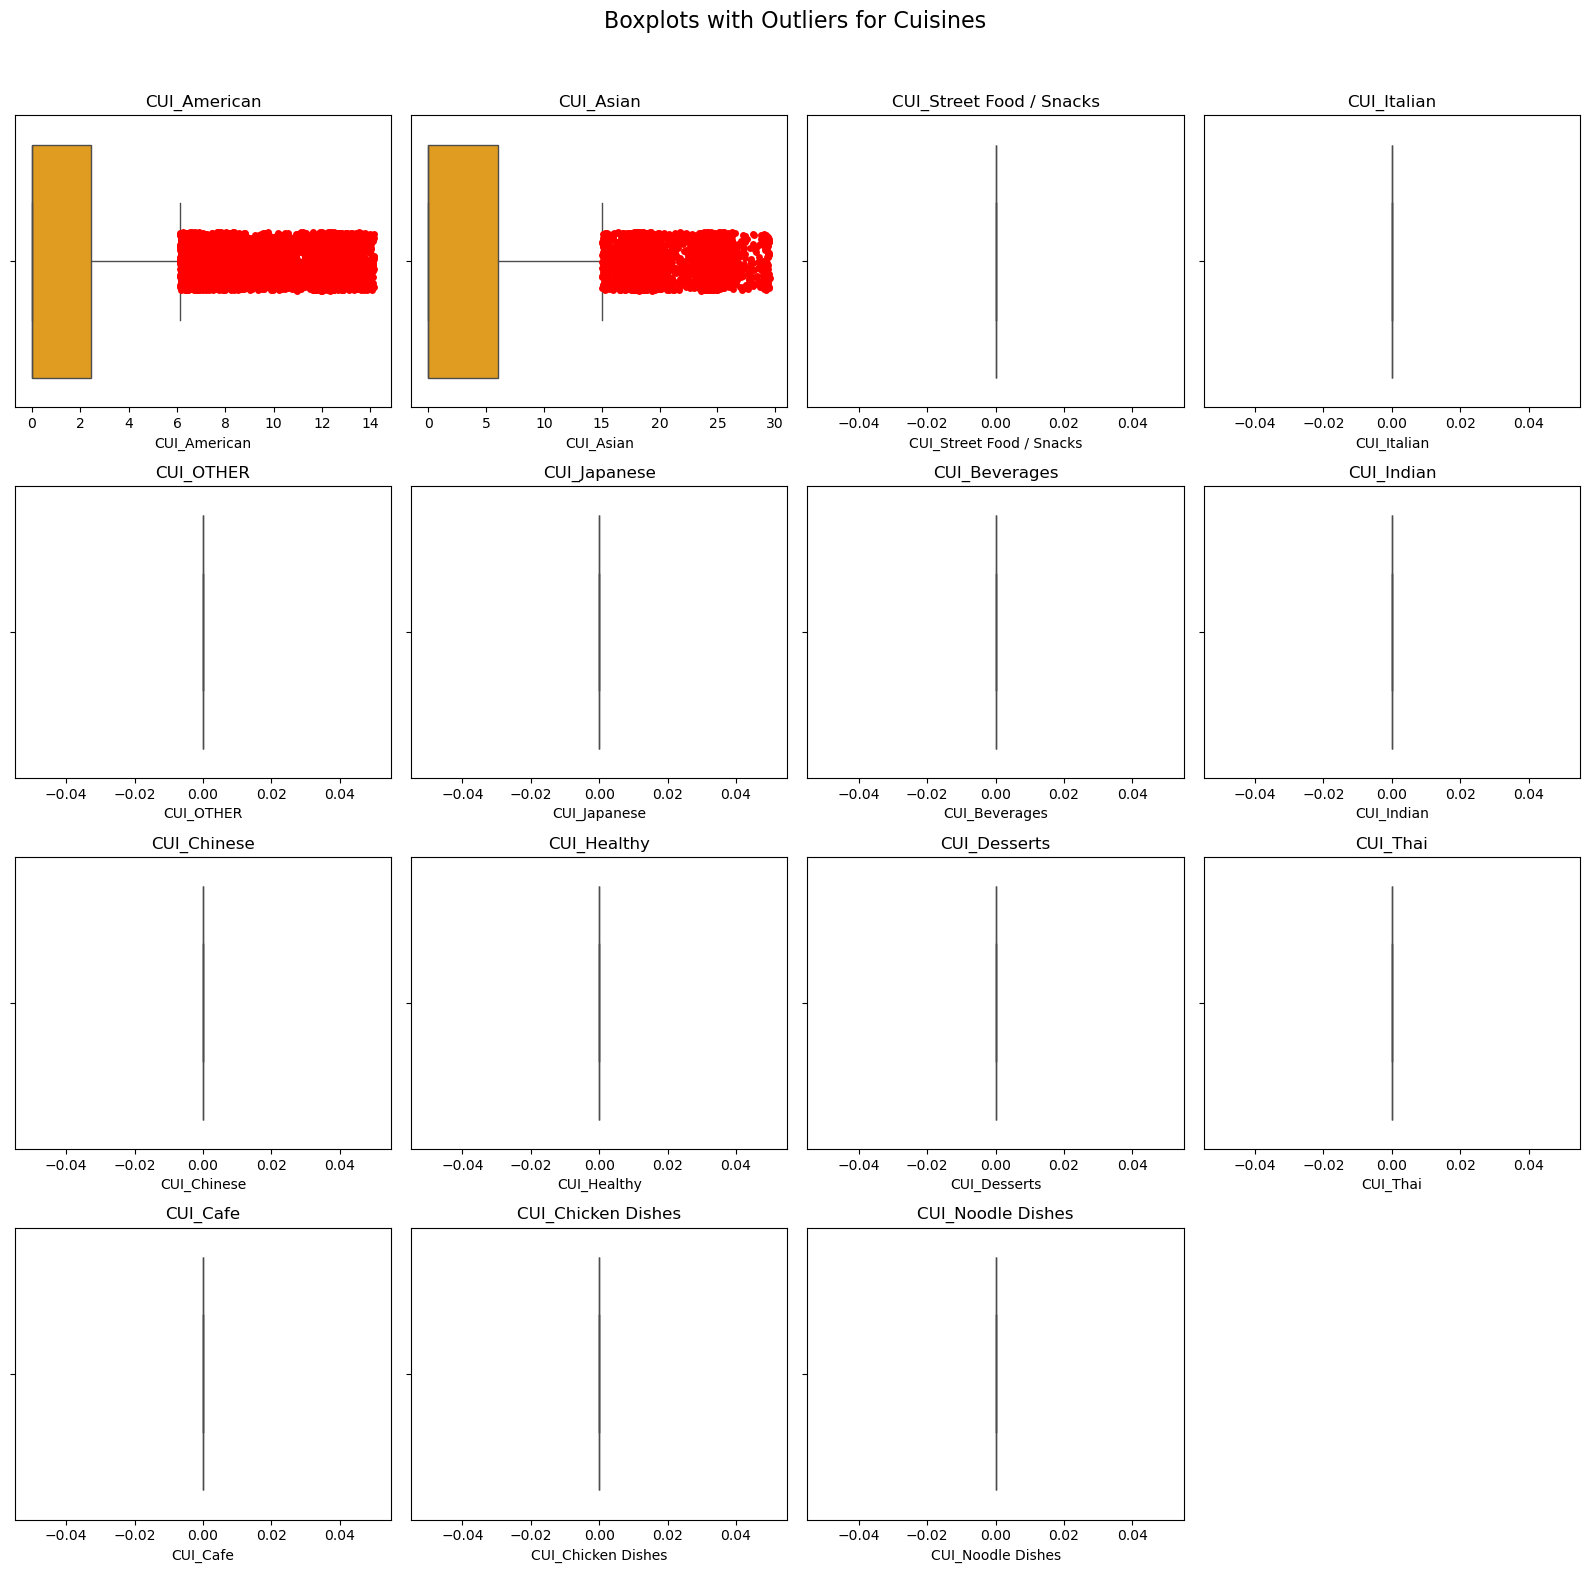

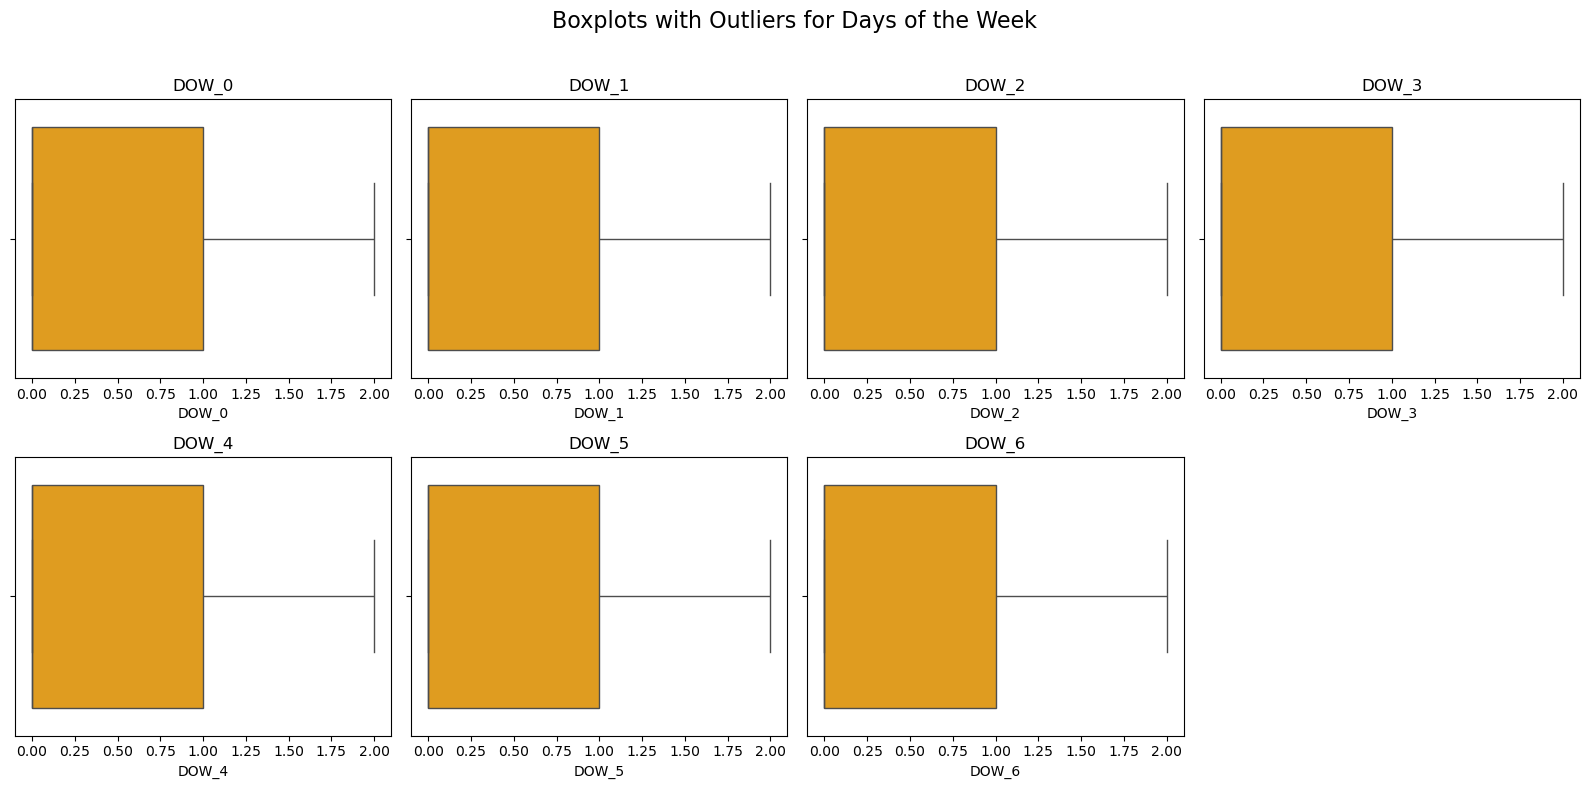

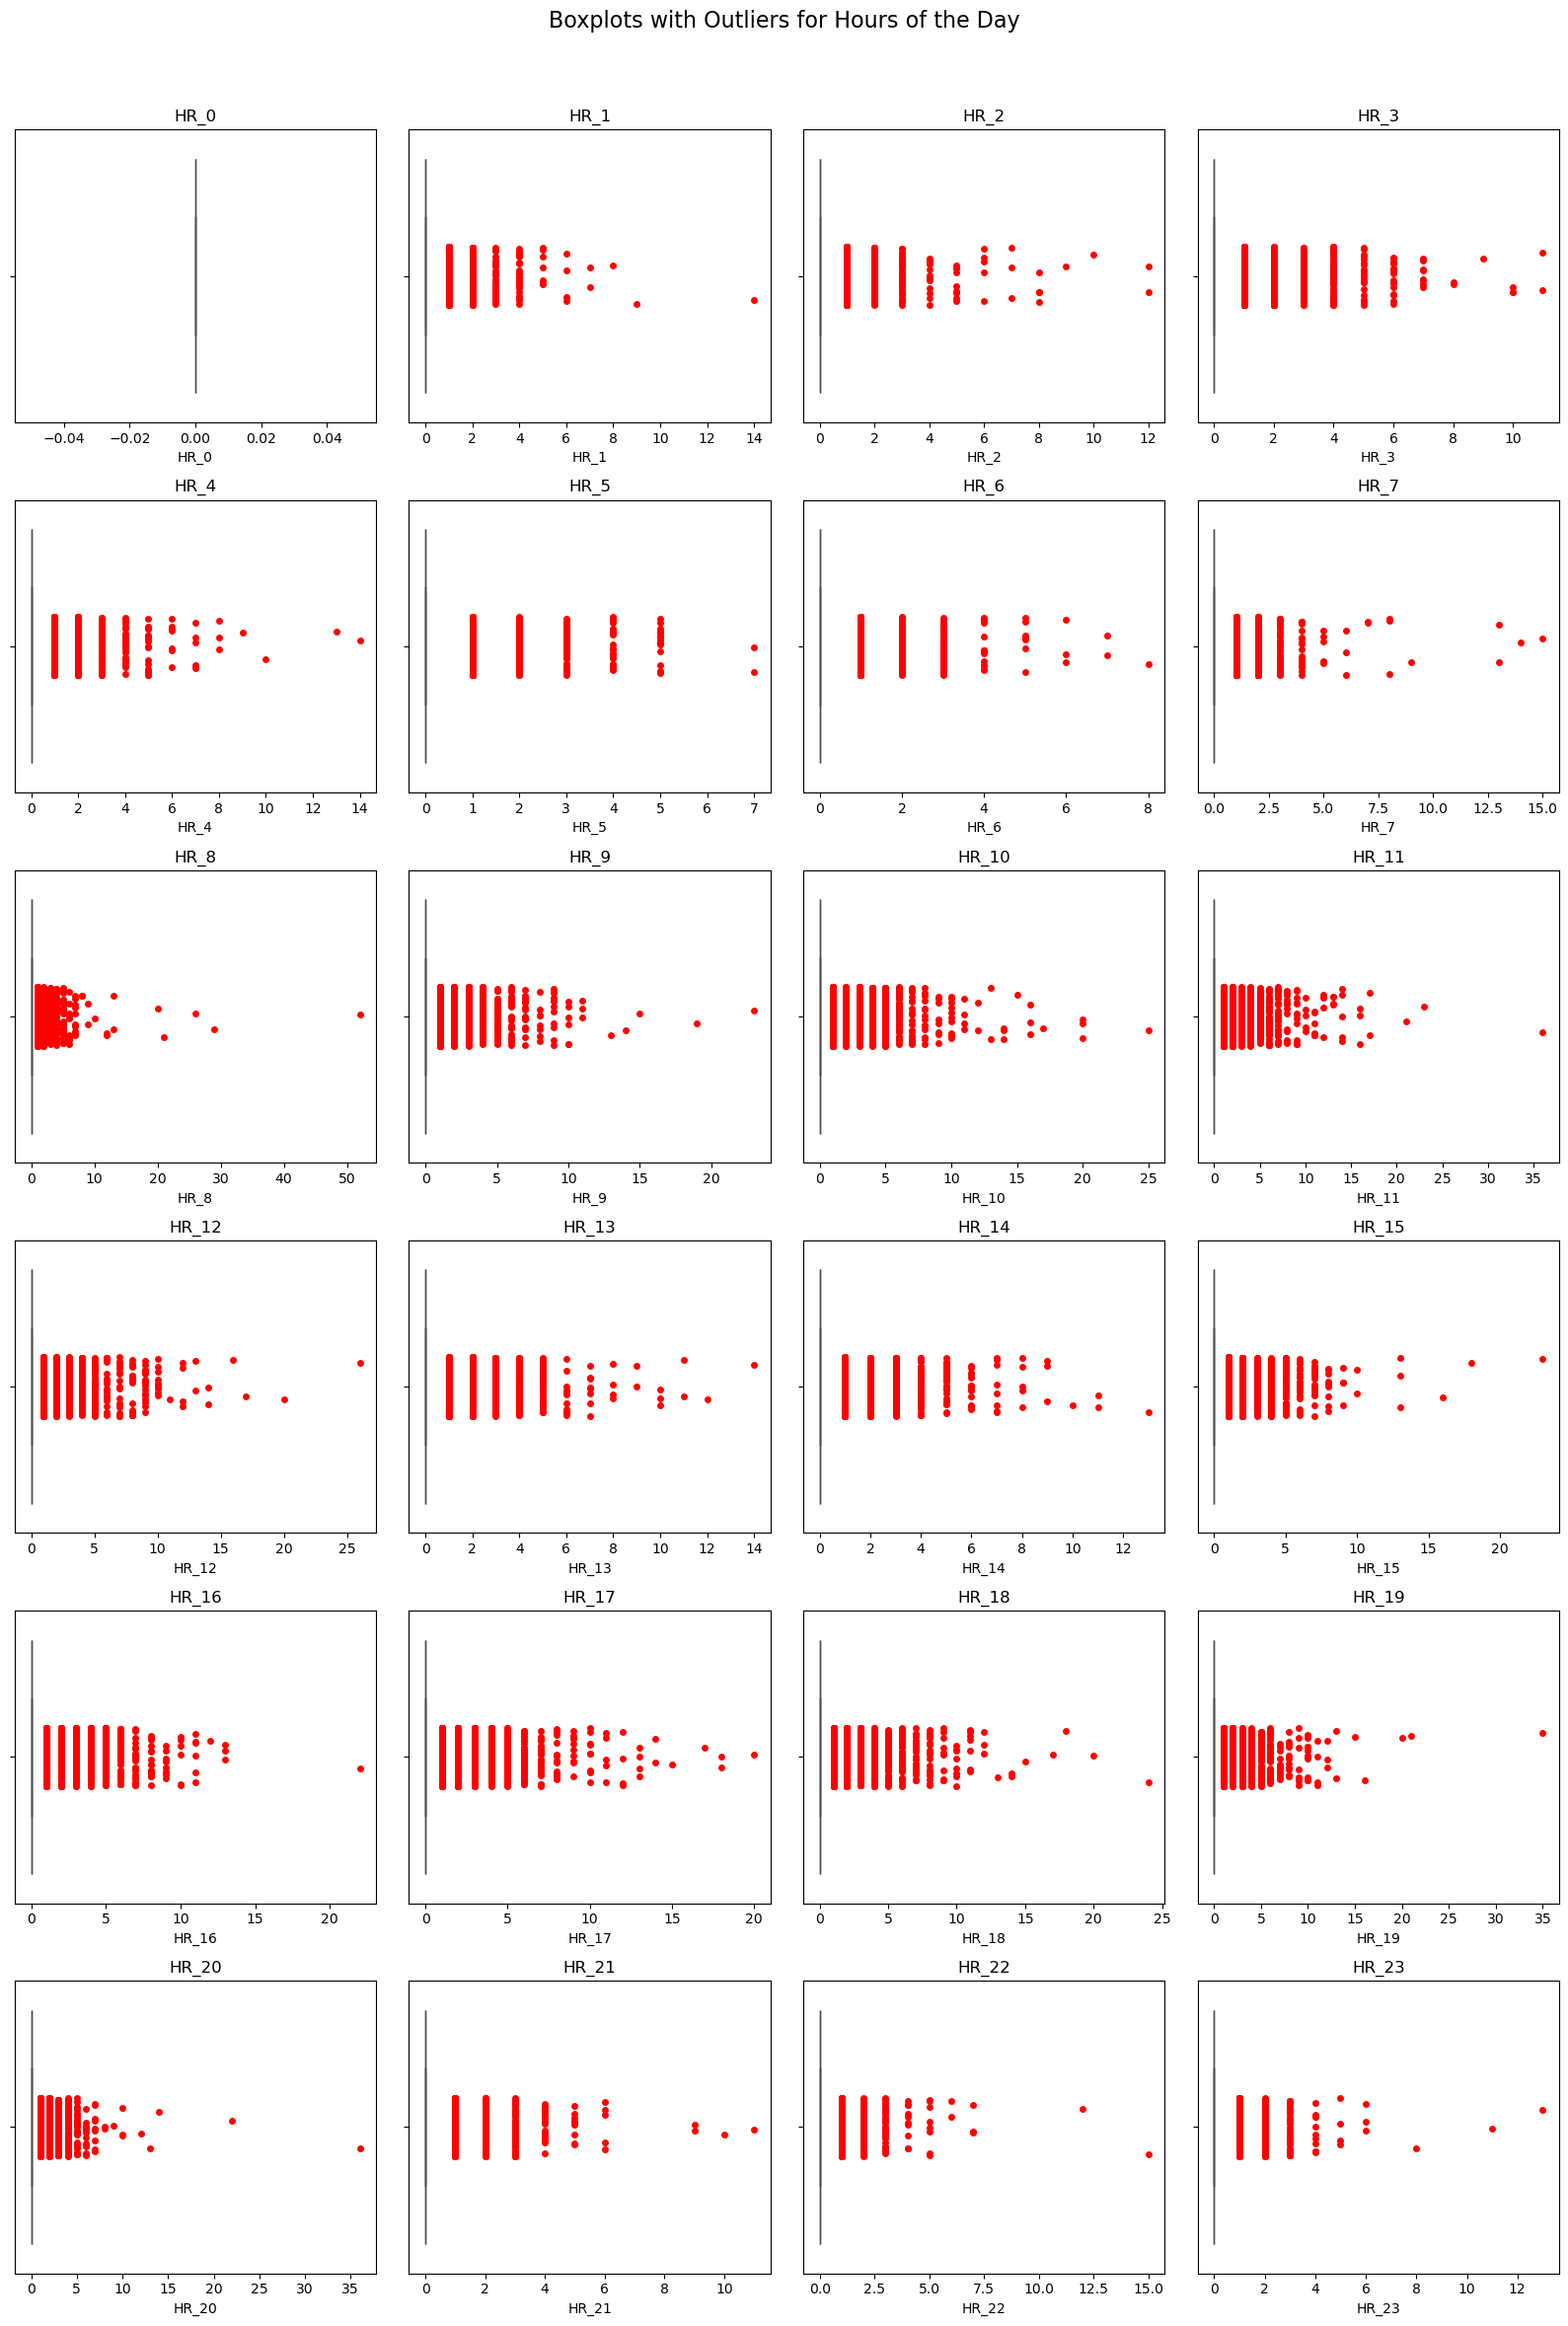

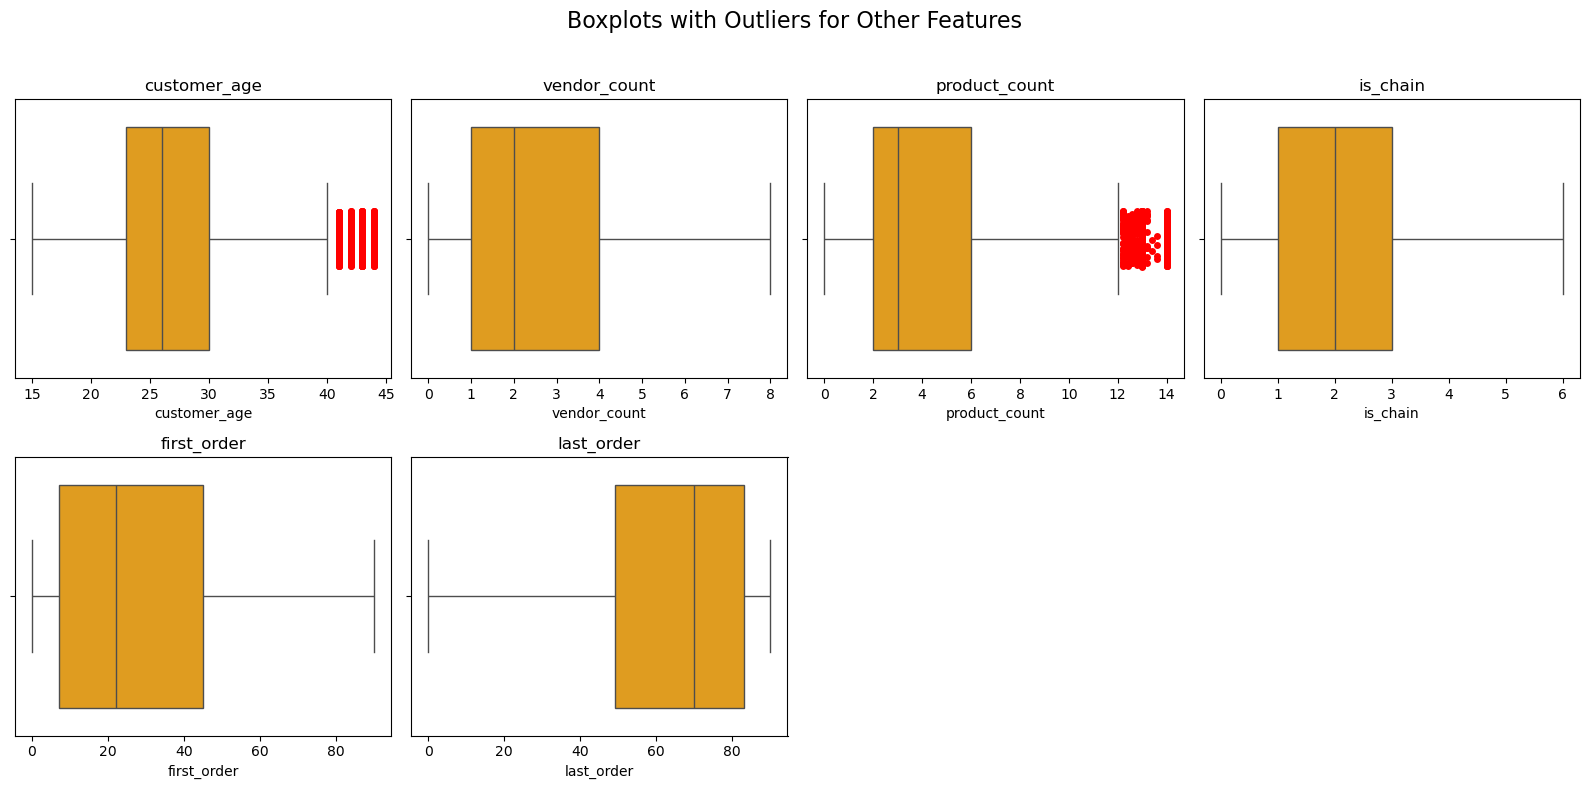

Columns with more than 5% outliers:
['CUI_American', 'CUI_Asian', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21']


In [45]:
outlier_results = detect_outliers_iqr(data, missing_threshold=5)

In [46]:
print(data[['CUI_American', 'CUI_Asian']].describe())

       CUI_American     CUI_Asian
count  31875.000000  31875.000000
mean       1.818995      3.982736
std        3.347833      6.799309
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        2.453000      6.002000
max       14.150000     29.570000


**NOTE: We wont remove these outliers, since they are values we consider reasonable even if the mean of the features are close to zero, we know that the mean is influenced by the large amount of zeros.**

# 2.2 Create New Features

In this section, we engineer new features to enrich our dataset with additional insights into customer behavior. 

Examples include calculating activity durations, spending patterns on weekends or specific times, and identifying favorite cuisines or loyalty indicators. 

These new variables aim to enhance our understanding of the dataset and support more effective clustering or predictive modeling.

[⬆️ Back to Top](#top)

1. **Order Activity Duration**:
- Represents the duration (in days) between the customer's first and last orders. This provides an idea of how long the customer has been active.

In [47]:
data['order_activity_duration'] = data['last_order'] - data['first_order']
number_var.append("order_activity_duration")

2. **Order Frequency**:
- Measures the average frequency of orders placed by the customer. Calculated as the total product count divided by the order activity duration, with safeguards to prevent division by zero.

In [48]:
data['order_frequency'] = data['product_count'] / (data['order_activity_duration'].replace(0, 1))
number_var.append("order_frequency")

3. **Loyal Customer Flag**:
- A binary indicator that marks whether a customer has fewer vendors than products, signifying vendor loyalty.

In [49]:
data['loyal_customer'] = data['vendor_count'] < data['product_count']
category_var.append("loyal_customer")

4. **Cuisine Diversity**:
- Counts the number of unique cuisines a customer has ordered from, giving insight into the customer's variety preferences.

In [50]:
data['cuisine_diversity'] = (data[[col for col in number_var if col.startswith('CUI_')]] > 0).sum(axis=1)
number_var.append("cuisine_diversity")

5. **Favorite Cuisine**:
- Identifies the customer's most frequently ordered cuisine by determining the maximum value among cuisine-related columns.

In [51]:
data['favorite_cuisine'] = data[[col for col in number_var if col.startswith('CUI_')]].idxmax(axis=1)
category_var.append("favorite_cuisine")

6. **Frequent Order Flag**:
- A binary feature that indicates whether a customer's total product count exceeds the average product count in the dataset, identifying high-frequency buyers.

In [52]:
data['frequent_order_flag'] = data['product_count'] > data['product_count'].mean()
category_var.append("frequent_order_flag")

7. **Weekend Spending**:
- Sums the customer's orders placed on weekend days (Saturday and Sunday, represented by `DOW_0` and `DOW_6`), giving insight into weekend buying habits.

In [53]:
data['weekend_spending'] = data['DOW_0'] + data['DOW_6']
number_var.append("weekend_spending")

8. **Week Spending**:
- Calculates the total orders placed by the customer on weekdays (Monday through Friday, represented by `DOW_1` to `DOW_5`), providing weekday purchase behavior insights.

In [54]:
data['week_spending'] = data[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].sum(axis=1)
number_var.append("week_spending")

9. **Age Group**
- Categorizes customers into predefined age ranges (e.g., `15-25`, `26-35`, etc.), enabling demographic segmentation for better customer understanding.

In [55]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['age_group'] = pd.cut(data['customer_age'], bins=bins, labels=labels, right=False)
category_var.append('age_group')

10. **Promo Used**
- A binary feature indicating whether a customer used a promotional offer (`1`) or not (`0`). Useful for evaluating the effectiveness of promotional campaigns.

In [56]:
data['promo_used'] = data['last_promo'].notnull().astype(int)
category_var.append('promo_used')

11.  **Total Orders**
- Summarizes the total number of orders placed by a customer. It helps in measuring overall customer engagement and activity levels.

In [57]:
data['total_orders'] = data[[f'DOW_{i}' for i in range(7)]].sum(axis=1)
number_var.append('total_orders')

12. **Average Spent Per Product**
- Calculates the average amount spent by a customer per product. This metric provides insights into purchasing behavior and spending patterns.

In [58]:
data['avg_spent_per_product'] = data['total_orders'] / data['product_count'].replace(0, 1)
number_var.append('avg_spent_per_product')

13. **Total Money Spent**
- Represents the total money spent by a customer across all orders. Calculated by summing up the spending on all transactions, providing insights into customer expenditure.

In [59]:
data['total_money_spent'] = data['product_count'] * data['avg_spent_per_product']
number_var.append('total_money_spent')

### Spending Features by Time of Day

In this section, we created new features that capture customer spending behavior during different times of the day. These features are derived by summing up the order counts across specific hourly ranges:

- **Supper Spending:** Aggregates orders placed during late-night and early-morning hours (HR_0 to HR_5).
- **Breakfast Spending:** Captures orders made during typical breakfast hours (HR_6 to HR_10).
- **Lunch Spending:** Represents total orders made during lunchtime (HR_11 to HR_15).
- **Snack Spending:** Includes orders placed during snack hours in the afternoon (HR_16 to HR_18).
- **Dinner Spending:** Summarizes orders made during dinner hours (HR_19 to HR_23).

These features help identify customer preferences and behaviors during various time periods throughout the day.

In [60]:
data['supper_spending'] = data[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']].sum(axis=1)
data['breakfast_spending'] = data[['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10']].sum(axis=1)
data['lunch_spending'] = data[['HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15']].sum(axis=1)
data['snack_spending'] = data[['HR_16', 'HR_17', 'HR_18']].sum(axis=1)
data['dinner_spending'] = data[['HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1)
number_var.append("supper_spending")
number_var.append("breakfast_spending")
number_var.append("lunch_spending")
number_var.append("snack_spending")
number_var.append("dinner_spending")

### Cuisine Category Features

Here, we created features to categorize customer spending based on different types of cuisines. These new features group various cuisine types into broader categories:

- **Asian Cuisines:** Includes orders for cuisines like Chinese, Indian, Japanese, Thai, and Noodle Dishes.
- **Western Cuisines:** Represents orders for American, Italian, Street Food, Snacks, and Cafe items.
- **Others Cuisines:** Captures orders for categories such as Healthy options, Beverages, Desserts, and other non-conventional cuisines.

By summing the orders for each category, these features provide insights into customer preferences across broad cuisine groups.

In [61]:
asian_cuisines = ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']
western_cuisines = ['CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks', 'CUI_Cafe']
others_cuisines = ['CUI_Healthy', 'CUI_Beverages', 'CUI_OTHER', 'CUI_Chicken Dishes', 'CUI_Desserts']

data['Asian_Cuisines'] = data[asian_cuisines].sum(axis=1)
data['Western_Cuisines'] = data[western_cuisines].sum(axis=1)
data['Others_Cuisines'] = data[others_cuisines].sum(axis=1)

number_var.append("Asian_Cuisines")
number_var.append("Western_Cuisines")
number_var.append("Others_Cuisines")

Afterwards, we added new features to analyze customer preferences as proportions of their total cuisine orders:

- **Total Cuisine Orders:** The sum of orders across all cuisine categories (Asian, Western, and Others), providing a holistic view of customer cuisine preferences.
- **Asian Cuisines Ratio:** The fraction of Asian cuisine orders compared to the total cuisine orders, highlighting the degree of preference for Asian cuisines.
- **Western Cuisines Ratio:** The proportion of Western cuisine orders relative to the total, offering insights into Western food preferences.
- **Others Cuisines Ratio:** The ratio of orders from the "Others" cuisine category to the total, capturing preferences for alternative cuisines.

In [62]:
data['Total_Cuisine_Orders'] = data['Asian_Cuisines'] + data['Western_Cuisines'] + data['Others_Cuisines']
data['Asian_Cuisines_Ratio'] = data['Asian_Cuisines'] / data['Total_Cuisine_Orders']
data['Western_Cuisines_Ratio'] = data['Western_Cuisines'] / data['Total_Cuisine_Orders']
data['Others_Cuisines_Ratio'] = data['Others_Cuisines'] / data['Total_Cuisine_Orders']

number_var.append("Total_Cuisine_Orders")
number_var.append("Asian_Cuisines_Ratio")
number_var.append("Western_Cuisines_Ratio")
number_var.append("Others_Cuisines_Ratio")

Finally, we removed unnecessary columns from the dataset, including detailed hourly, daily, and individual cuisine-specific order features. 

This cleanup focuses the dataset on higher-level aggregated and ratio-based features to simplify analysis and reduce dimensionality.

In [63]:
columns_to_remove = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23','CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes',
         'CUI_Thai','CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks', 'CUI_Cafe', 'CUI_Healthy', 'Asian_Cuisines', 'Western_Cuisines', 'Others_Cuisines', 'CUI_Beverages', 'CUI_OTHER', 'CUI_Chicken Dishes', 'CUI_Desserts'] 

data = data.drop(columns=columns_to_remove)

for column in columns_to_remove:
    number_var.remove(column)

In [64]:
data.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'order_activity_duration', 'order_frequency', 'loyal_customer',
       'cuisine_diversity', 'favorite_cuisine', 'frequent_order_flag',
       'weekend_spending', 'week_spending', 'age_group', 'promo_used',
       'total_orders', 'avg_spent_per_product', 'total_money_spent',
       'supper_spending', 'breakfast_spending', 'lunch_spending',
       'snack_spending', 'dinner_spending', 'Total_Cuisine_Orders',
       'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio',
       'Others_Cuisines_Ratio'],
      dtype='object')

## Visualizations of New Features

After generating the new features, we utilize various plots such as histograms and bar charts to explore their distributions. 

These visualizations help verify the relevance and interpretability of the new features, providing a clearer picture of the data transformations.

C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4267135048.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette=[orange_shades[i]], ax=axes[i])
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4267135048.py:29: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=data, palette=[orange_shades[i]], ax=axes[i])
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4267135048.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette=[orange_shades[i]], ax=axes[i])
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\4267135048.py:29: UserWarning: 
The

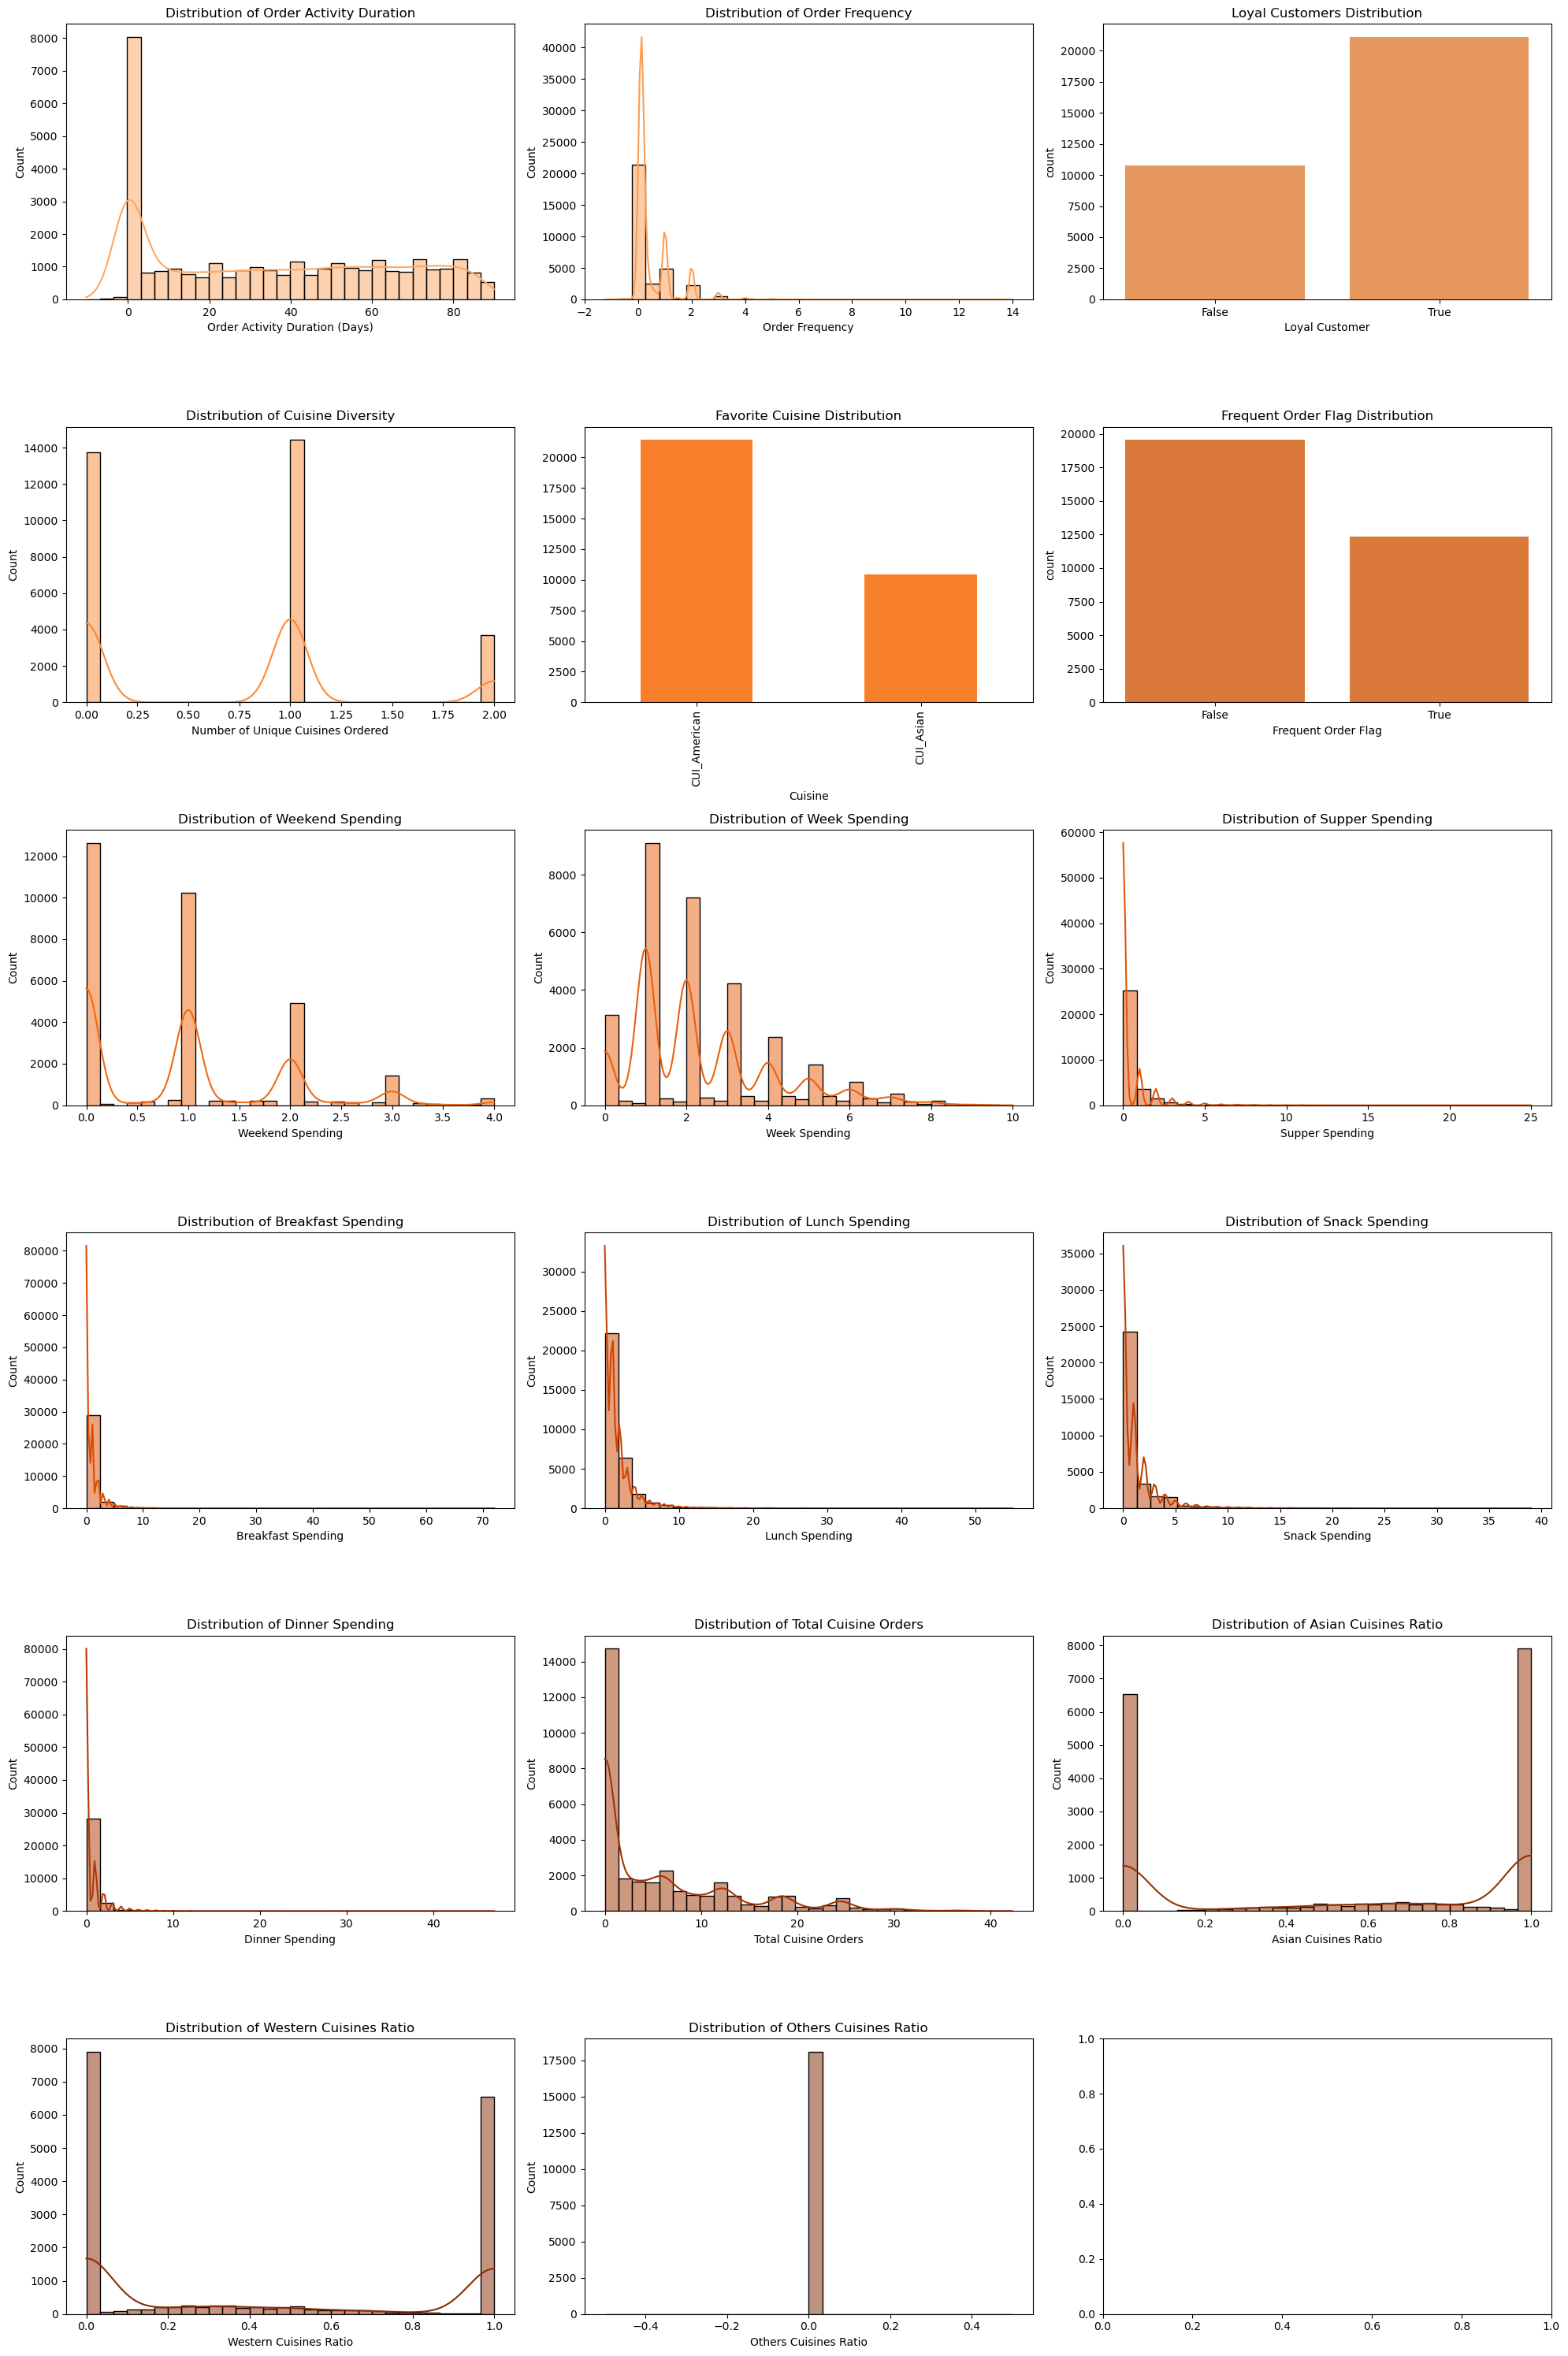

In [65]:
num_plots = 17
orange_shades = plt.cm.Oranges(np.linspace(0.4, 1, num_plots))
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axes = axes.flatten()

plot_data = [
    ('order_activity_duration', 'Distribution of Order Activity Duration', 'Order Activity Duration (Days)'),
    ('order_frequency', 'Distribution of Order Frequency', 'Order Frequency'),
    ('loyal_customer', 'Loyal Customers Distribution', 'Loyal Customer'),
    ('cuisine_diversity', 'Distribution of Cuisine Diversity', 'Number of Unique Cuisines Ordered'),
    ('favorite_cuisine', 'Favorite Cuisine Distribution', 'Cuisine'),
    ('frequent_order_flag', 'Frequent Order Flag Distribution', 'Frequent Order Flag'),
    ('weekend_spending', 'Distribution of Weekend Spending', 'Weekend Spending'),
    ('week_spending', 'Distribution of Week Spending', 'Week Spending'),
    ('supper_spending', 'Distribution of Supper Spending', 'Supper Spending'),
    ('breakfast_spending', 'Distribution of Breakfast Spending', 'Breakfast Spending'),
    ('lunch_spending', 'Distribution of Lunch Spending', 'Lunch Spending'),
    ('snack_spending', 'Distribution of Snack Spending', 'Snack Spending'),
    ('dinner_spending', 'Distribution of Dinner Spending', 'Dinner Spending'),
    ('Total_Cuisine_Orders', 'Distribution of Total Cuisine Orders', 'Total Cuisine Orders'),
    ('Asian_Cuisines_Ratio', 'Distribution of Asian Cuisines Ratio', 'Asian Cuisines Ratio'),
    ('Western_Cuisines_Ratio', 'Distribution of Western Cuisines Ratio', 'Western Cuisines Ratio'),
    ('Others_Cuisines_Ratio', 'Distribution of Others Cuisines Ratio', 'Others Cuisines Ratio')
]

for i, (col, title, xlabel) in enumerate(plot_data):
    if col in data.columns:
        if col == 'loyal_customer' or col == 'frequent_order_flag':
            sns.countplot(x=col, data=data, palette=[orange_shades[i]], ax=axes[i])
        elif col == 'favorite_cuisine':
            data[col].value_counts().plot(kind='bar', color=orange_shades[i], ax=axes[i])
        else:
            sns.histplot(data[col], bins=30, kde=True, color=orange_shades[i], ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel(xlabel)

plt.tight_layout()
plt.show()

In [66]:
data.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'order_activity_duration', 'order_frequency', 'loyal_customer',
       'cuisine_diversity', 'favorite_cuisine', 'frequent_order_flag',
       'weekend_spending', 'week_spending', 'age_group', 'promo_used',
       'total_orders', 'avg_spent_per_product', 'total_money_spent',
       'supper_spending', 'breakfast_spending', 'lunch_spending',
       'snack_spending', 'dinner_spending', 'Total_Cuisine_Orders',
       'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio',
       'Others_Cuisines_Ratio'],
      dtype='object')

C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\2119251398.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('customer_region')['total_money_spent'].sum().plot(kind='bar', color=orange_shades[1], ax=axes[1])
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\2119251398.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('customer_region')['total_orders'].sum().plot(kind='bar', color=orange_shades[2], ax=axes[2])
C:\Users\gonca\AppData\Local\Temp\ipykernel_1752\2119251398.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versi

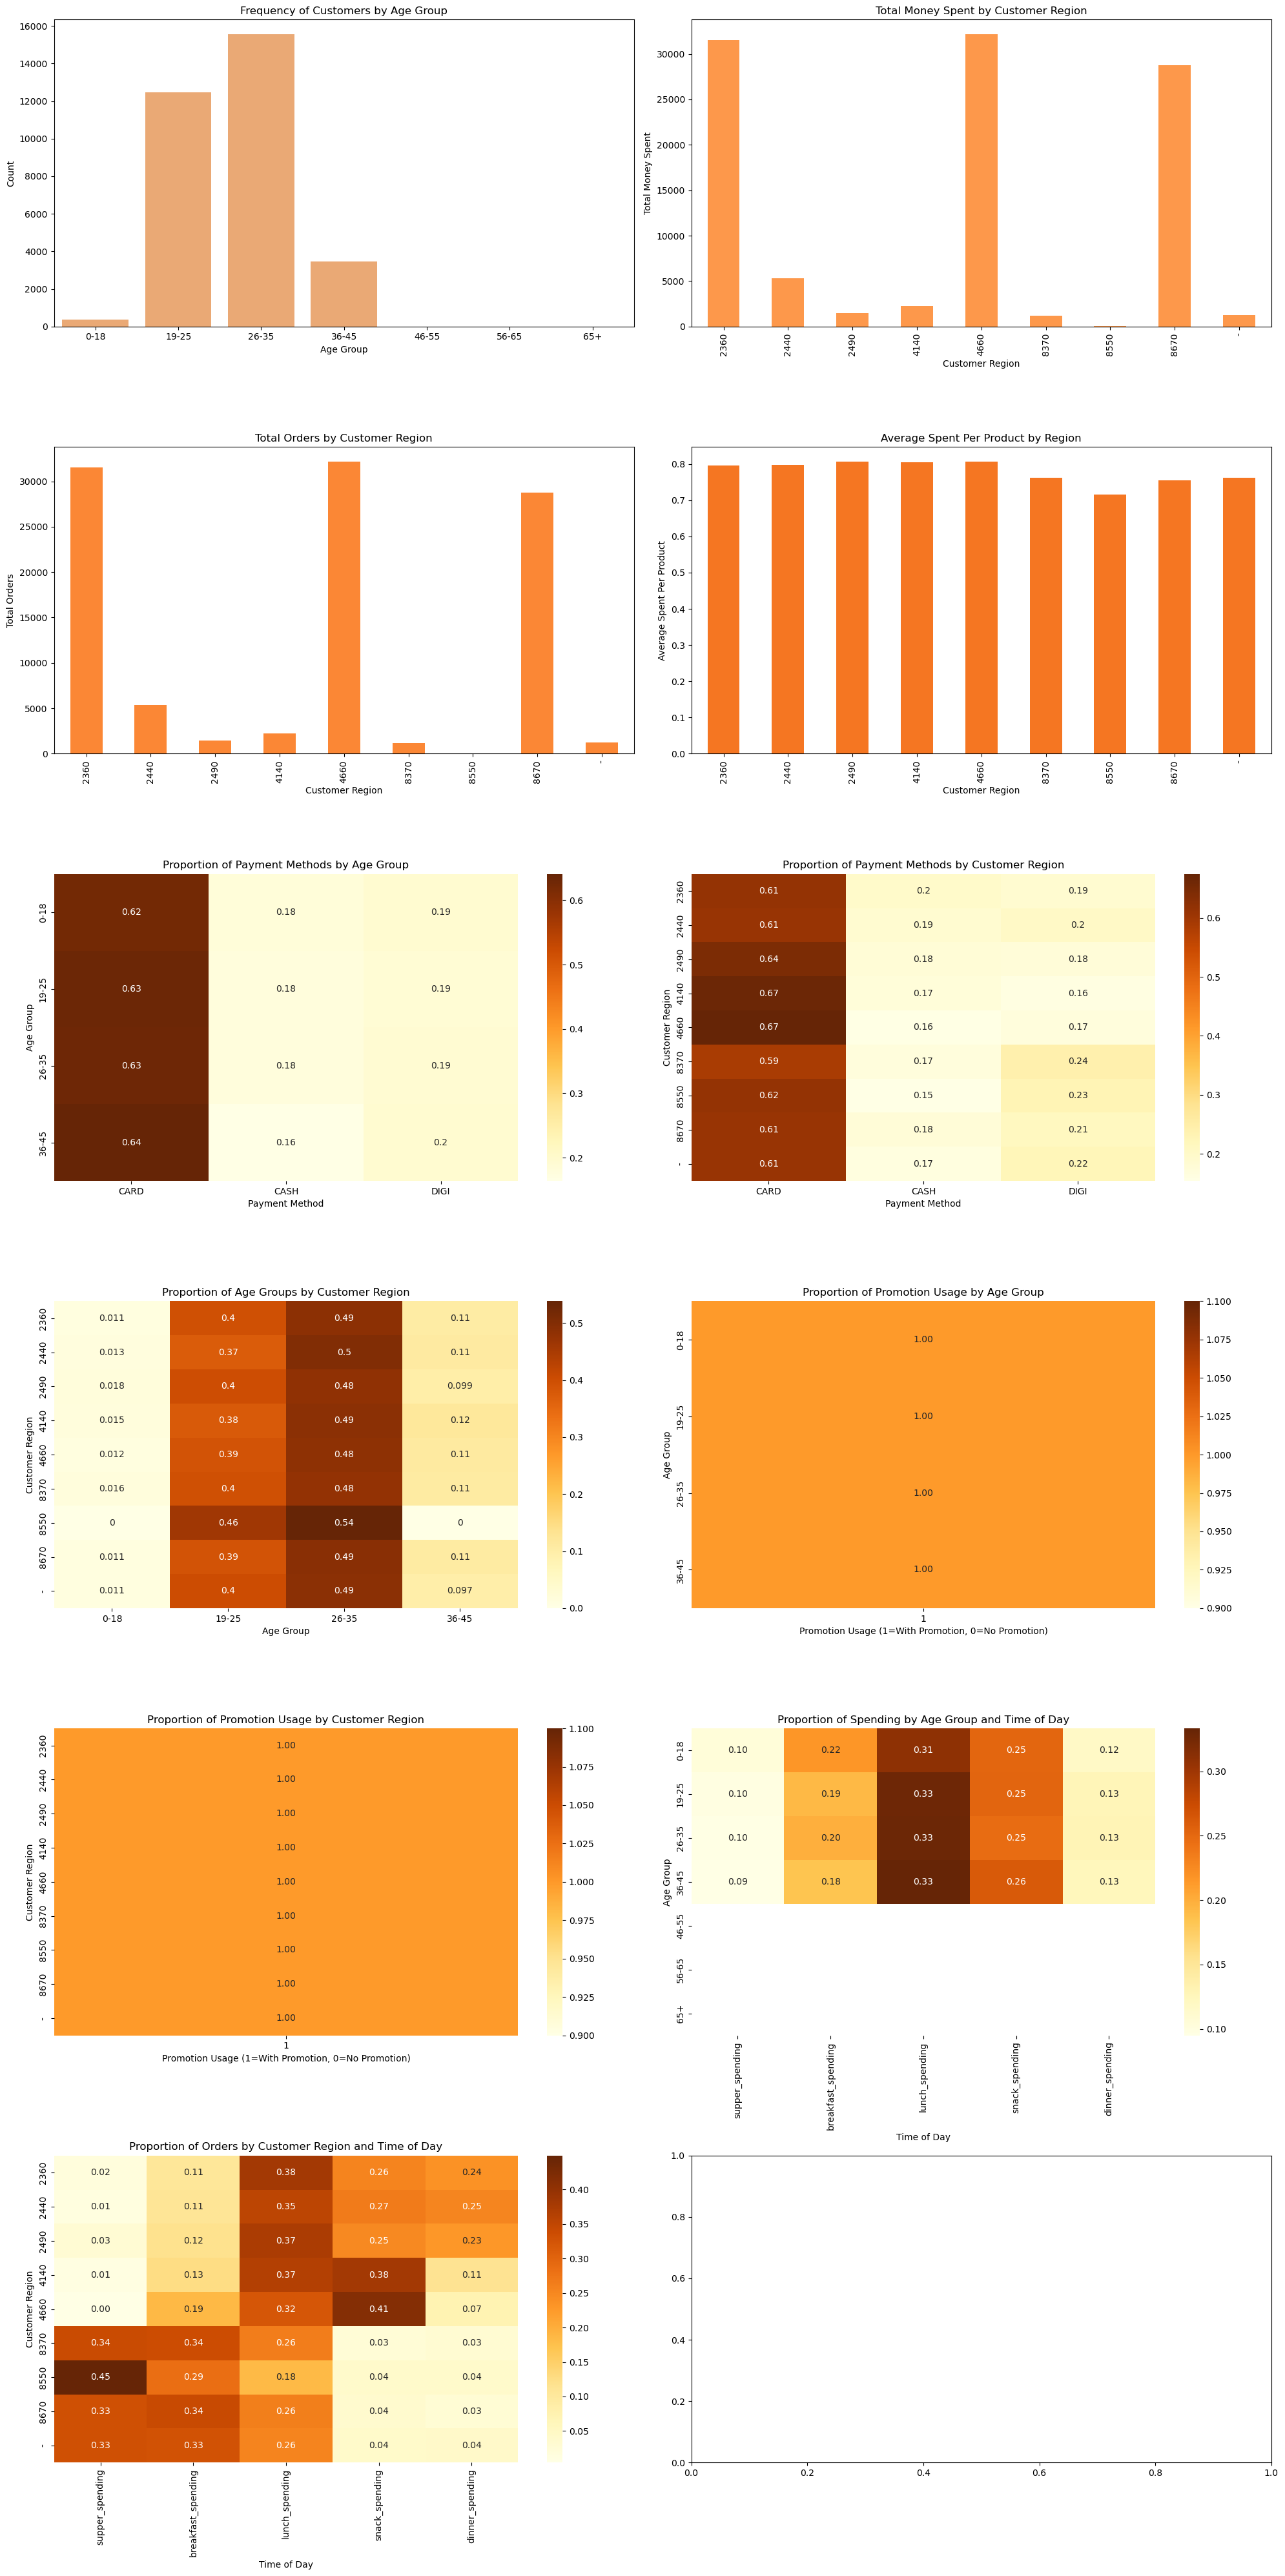

In [67]:
num_plots = 11
orange_shades = plt.cm.Oranges(np.linspace(0.4, 1, num_plots))
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 40))
axes = axes.flatten()

# Plot 1: Frequency of Customers by Age Group
sns.countplot(data=data, x='age_group', color=orange_shades[0], ax=axes[0])
axes[0].set_title('Frequency of Customers by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot 2: Total Money Spent by Customer Region
data.groupby('customer_region')['total_money_spent'].sum().plot(kind='bar', color=orange_shades[1], ax=axes[1])
axes[1].set_title('Total Money Spent by Customer Region')
axes[1].set_xlabel('Customer Region')
axes[1].set_ylabel('Total Money Spent')

# Plot 3: Total Orders by Customer Region
data.groupby('customer_region')['total_orders'].sum().plot(kind='bar', color=orange_shades[2], ax=axes[2])
axes[2].set_title('Total Orders by Customer Region')
axes[2].set_xlabel('Customer Region')
axes[2].set_ylabel('Total Orders')

# Plot 4: Average Spent Per Product by Region
data.groupby('customer_region')['avg_spent_per_product'].mean().plot(kind='bar', color=orange_shades[3], ax=axes[3])
axes[3].set_title('Average Spent Per Product by Region')
axes[3].set_xlabel('Customer Region')
axes[3].set_ylabel('Average Spent Per Product')

# Plot 5: Proportion of Payment Methods by Age Group
sns.heatmap(pd.crosstab(data['age_group'], data['payment_method'], normalize='index'), annot=True, cmap="YlOrBr", ax=axes[4])
axes[4].set_title("Proportion of Payment Methods by Age Group")
axes[4].set_xlabel("Payment Method")
axes[4].set_ylabel("Age Group")

# Plot 6: Proportion of Payment Methods by Customer Region
sns.heatmap(pd.crosstab(data['customer_region'], data['payment_method'], normalize='index'), annot=True, cmap="YlOrBr", ax=axes[5])
axes[5].set_title("Proportion of Payment Methods by Customer Region")
axes[5].set_xlabel("Payment Method")
axes[5].set_ylabel("Customer Region")

# Plot 7: Proportion of Age Groups by Customer Region
sns.heatmap(pd.crosstab(data['customer_region'], data['age_group'], normalize='index'), annot=True, cmap="YlOrBr", ax=axes[6])
axes[6].set_title("Proportion of Age Groups by Customer Region")
axes[6].set_xlabel("Age Group")
axes[6].set_ylabel("Customer Region")

# Plot 8: Proportion of Promotion Usage by Age Group
promo_usage_age_group = pd.crosstab(data['age_group'], data['promo_used'], normalize='index')
sns.heatmap(promo_usage_age_group, annot=True, cmap="YlOrBr", fmt=".2f", ax=axes[7])
axes[7].set_title("Proportion of Promotion Usage by Age Group")
axes[7].set_xlabel("Promotion Usage (1=With Promotion, 0=No Promotion)")
axes[7].set_ylabel("Age Group")

# Plot 9: Proportion of Promotion Usage by Customer Region
promo_usage_customer_region = pd.crosstab(data['customer_region'], data['promo_used'], normalize='index')
sns.heatmap(promo_usage_customer_region, annot=True, cmap="YlOrBr", fmt=".2f", ax=axes[8])
axes[8].set_title("Proportion of Promotion Usage by Customer Region")
axes[8].set_xlabel("Promotion Usage (1=With Promotion, 0=No Promotion)")
axes[8].set_ylabel("Customer Region")

# Plot 10: Proportion of Spending by Age Group and Time of Day
time_of_day_spending = ['supper_spending', 'breakfast_spending', 'lunch_spending', 'snack_spending', 'dinner_spending']
spending_data = data.groupby('age_group')[time_of_day_spending].sum()
spending_data_normalized = spending_data.div(spending_data.sum(axis=1), axis=0)
sns.heatmap(spending_data_normalized, annot=True, cmap="YlOrBr", ax=axes[9], fmt=".2f")
axes[9].set_title("Proportion of Spending by Age Group and Time of Day")
axes[9].set_xlabel("Time of Day")
axes[9].set_ylabel("Age Group")

# Plot 11: Proportion of Orders by Customer Region and Time of Day
region_time_spending = data.groupby('customer_region')[time_of_day_spending].sum()
region_time_spending_normalized = region_time_spending.div(region_time_spending.sum(axis=1), axis=0)
sns.heatmap(region_time_spending_normalized, annot=True, cmap="YlOrBr", ax=axes[10], fmt=".2f")
axes[10].set_title("Proportion of Orders by Customer Region and Time of Day")
axes[10].set_xlabel("Time of Day")
axes[10].set_ylabel("Customer Region")

plt.tight_layout()
plt.show()

## Impute Missing Values of New Features (KNN)

Using KNN Imputation, we address any missing values in the newly created numerical features. 

This ensures a complete dataset for analysis while preserving the natural relationships among variables.

In [68]:
knn_imputer = KNNImputer(n_neighbors=5)
data[number_var] = knn_imputer.fit_transform(data[number_var])
print(data.isnull().sum())

customer_region            0
customer_age               0
vendor_count               0
product_count              0
is_chain                   0
first_order                0
last_order                 0
last_promo                 0
payment_method             0
order_activity_duration    0
order_frequency            0
loyal_customer             0
cuisine_diversity          0
favorite_cuisine           0
frequent_order_flag        0
weekend_spending           0
week_spending              0
age_group                  0
promo_used                 0
total_orders               0
avg_spent_per_product      0
total_money_spent          0
supper_spending            0
breakfast_spending         0
lunch_spending             0
snack_spending             0
dinner_spending            0
Total_Cuisine_Orders       0
Asian_Cuisines_Ratio       0
Western_Cuisines_Ratio     0
Others_Cuisines_Ratio      0
dtype: int64


## Encoding Categorical Data (?)

In [69]:
data[category_var] = data[category_var].apply(lambda col: col.map(col.value_counts(normalize=True)))
data.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,order_activity_duration,...,total_money_spent,supper_spending,breakfast_spending,lunch_spending,snack_spending,dinner_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio,Others_Cuisines_Ratio
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.276988,18.0,2.0,5.0,1.0,0.0,1.0,0.197082,0.191310,1.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.000,0.200000,0.800000,0.0
5d272b9dcb,0.306227,17.0,2.0,2.0,2.0,0.0,1.0,0.141051,0.191310,1.0,...,2.0,0.0,1.0,1.0,0.0,0.0,19.210,0.332639,0.667361,0.0
f6d1b2ba63,0.299608,38.0,1.0,2.0,2.0,0.0,1.0,0.141051,0.176439,1.0,...,2.0,0.0,1.0,1.0,0.0,0.0,9.200,0.000000,1.000000,0.0
180c632ed8,0.299608,21.0,2.0,3.0,1.0,0.0,2.0,0.197082,0.191310,2.0,...,2.0,0.0,0.0,2.0,0.0,0.0,13.700,1.000000,0.000000,0.0
4eb37a6705,0.299608,20.0,2.0,5.0,0.0,0.0,2.0,0.525302,0.191310,2.0,...,2.0,0.0,2.0,0.0,0.0,0.0,7.336,0.740458,0.259542,0.0


In [70]:
data = data.drop(columns=category_var)

In [71]:
data.to_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", index=False)

# 2.3 Scaling Numerical Data (MinMaxScaler)

Here, we scale all numerical variables using the MinMaxScaler. 

This transforms the features into a range between 0 and 1, ensuring comparability across variables with different units or ranges. 

Scaling is essential for improving the performance of distance-based models, such as clustering.

[⬆️ Back to Top](#top)

In [72]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[number_var])
data = pd.DataFrame(scaled_data, columns=number_var, index=data.index)

In [73]:
data.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,...,total_money_spent,supper_spending,breakfast_spending,lunch_spending,snack_spending,dinner_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio,Others_Cuisines_Ratio
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.103448,0.250,0.357143,0.166667,0.0,0.011111,0.111776,0.409836,0.0,0.50,...,0.151515,0.0,0.000000,0.000000,0.051282,0.0,0.000000,0.200000,0.800000,0.0
5d272b9dcb,0.068966,0.250,0.142857,0.333333,0.0,0.011111,0.111776,0.213115,1.0,0.50,...,0.151515,0.0,0.013889,0.018182,0.000000,0.0,0.454137,0.332639,0.667361,0.0
f6d1b2ba63,0.793103,0.125,0.142857,0.333333,0.0,0.011111,0.111776,0.213115,0.5,0.50,...,0.151515,0.0,0.013889,0.018182,0.000000,0.0,0.217494,0.000000,1.000000,0.0
180c632ed8,0.206897,0.250,0.214286,0.166667,0.0,0.022222,0.121756,0.180328,0.5,0.25,...,0.151515,0.0,0.000000,0.036364,0.000000,0.0,0.323877,1.000000,0.000000,0.0
4eb37a6705,0.172414,0.250,0.357143,0.000000,0.0,0.022222,0.121756,0.245902,1.0,0.25,...,0.151515,0.0,0.027778,0.000000,0.000000,0.0,0.173428,0.740458,0.259542,0.0


# 2.4 Feature Selection
[⬆️ Back to Top](#top)

## Correlation w/ New Features

This section evaluates correlations among features, including the newly created ones. High correlations (above 0.8) between variables are identified and analyzed. 

Based on this analysis, highly correlated features are considered for removal to avoid redundancy and multicollinearity.

In [74]:
correlation_matrix = data[number_var].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8 or abs(correlation_matrix.iloc[i, j]) < -0.8: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation
0,product_count,vendor_count,0.825181
1,total_orders,product_count,0.855038
2,total_orders,week_spending,0.913391
3,total_money_spent,product_count,0.855119
4,total_money_spent,week_spending,0.913320
5,total_money_spent,total_orders,0.999944
6,Western_Cuisines_Ratio,Asian_Cuisines_Ratio,-1.000000


**Drop vendor_count based on the correlation analysis**

In [75]:
data = data.drop(columns=['vendor_count'])
number_var.remove('vendor_count')

## Variance Evaluation

Using the `VarianceThreshold` method, we identify and filter out features with low variance (below a threshold of 0.01). 

Low-variance features provide little to no useful information for analysis or modeling and are removed to improve dataset efficiency. 

The resulting dataset contains only the most relevant features.

In [76]:
selector = VarianceThreshold(threshold=0.01)
data_num = selector.fit_transform(data[number_var])

In [77]:
filtered_columns = data[number_var].columns[selector.get_support()]
data_num = pd.DataFrame(data_num, columns=filtered_columns, index=data.index)

In [78]:
data_num.head()

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,cuisine_diversity,weekend_spending,week_spending,total_orders,total_money_spent,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio
customer_id,,,,,,,,,,,,,,
1b8f824d5e,0.103448,0.357143,0.166667,0.0,0.011111,0.111776,0.0,0.50,0.0,0.151515,0.151515,0.000000,0.200000,0.800000
5d272b9dcb,0.068966,0.142857,0.333333,0.0,0.011111,0.111776,1.0,0.50,0.0,0.151515,0.151515,0.454137,0.332639,0.667361
f6d1b2ba63,0.793103,0.142857,0.333333,0.0,0.011111,0.111776,0.5,0.50,0.0,0.151515,0.151515,0.217494,0.000000,1.000000
180c632ed8,0.206897,0.214286,0.166667,0.0,0.022222,0.121756,0.5,0.25,0.1,0.151515,0.151515,0.323877,1.000000,0.000000
4eb37a6705,0.172414,0.357143,0.000000,0.0,0.022222,0.121756,1.0,0.25,0.1,0.151515,0.151515,0.173428,0.740458,0.259542


The features selected are the following: 

**'customer_age', <br>**
**'product_count', <br>**
**'is_chain', <br>**
**'first_order', <br>**
**'last_order', <br>**
**'order_activity_duration', <br>**
**'cuisine_diversity', <br>**
**'weekend_spending', <br>**
**'week_spending', <br>**
**'Total_Cuisine_Orders', <br>**
**'Asian_Cuisines_Ratio', <br>**
**'Western_Cuisines_Ratio'. <br>**

# 3. Export

The preprocessed dataset, now optimized and cleaned, is exported to an Excel file named `Numeric_DM2425_ABCDEats_DATASET.xlsx`. 

[⬆️ Back to Top](#top)

In [79]:
data_num.to_excel("Numeric_Scaled_DM2425_ABCDEats_DATASET.xlsx", index=False)